<a href="https://colab.research.google.com/github/nprimavera/Financial-Models/blob/main/Model_to_Calculate_Stock_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# -------------------------------
# Code to calculate stock returns
# -------------------------------

# ---------------
# Import packages
# ---------------
import yfinance as yf                     # Download stock data from Yahoo Finance
import pandas as pd                       # Pandas library for data manipulation
import matplotlib.pyplot as plt           # Plotting
from datetime import datetime, timedelta  # For handling date ranges

# ---------------------------------------------------------
# Function to calculate returns over different time periods
# ---------------------------------------------------------
def calculate_returns(df, current_price):

    return_periods = {  # Define return periods (label: # of days ago)
        "1 Week": 7,
        "1 Month": 30,
        "3 Months": 90,
        "6 Months": 180,
        "1 Year": 365,
        "5 Years": 5 * 365,
    }

    print("\nReturns:")

    for label, days in return_periods.items():
        past_date = df.index.max() - timedelta(days=days)               # Calculate the target past date from the most recent date in the DataFrame
        past_data = df[df.index <= past_date]                           # Get the closest data before or equal to the target date
        if not past_data.empty:                                         # Check if there is data available (not empty)
            #past_price = past_data['Close'].iloc[-1]
            past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)
            returns = (current_price - past_price) / past_price * 100   # Calculate percent return: (Current - Past) / Past * 100
            print(f"{label} Return: {returns:.2f}%")
        else:
            print(f"{label} Return: Not enough data.")

# -----------------------------------------------------------------
# Function to plot 50-day and 200-day SMAs (simple moving averages)
# -----------------------------------------------------------------
def plot_sma(df, ticker):

    # Calculate the SMAs
    df['SMA_50'] = df['Close'].rolling(window=50).mean()    # 50 day
    df['SMA_200'] = df['Close'].rolling(window=200).mean()  # 200 day

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
    plt.plot(df.index, df['SMA_50'], label='50-Day SMA', linewidth=2)
    plt.plot(df.index, df['SMA_200'], label='200-Day SMA', linewidth=2)
    plt.title(f"{ticker} - 50-Day vs 200-Day SMA")
    plt.xlabel("Date (year)")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# Main function to run analysis for a single stock ticker
# -------------------------------------------------------
def analyze_stock(ticker):

    # Define date range
    end = datetime.today()  # Today
    start = end - timedelta(days=5*365 + 200)  # Last 5 years + 200 days for SMA calculation buffer

    df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance

    # Check to make sure there is data
    if df.empty:
        print("No data found.")
        return

    print(f"\n\nAnalyzing: {ticker}")

    #current_price = df['Close'].iloc[-1]
    current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations

    print(f"\nCurrent Price: ${current_price:.2f}")

    calculate_returns(df, current_price)  # Compute historical returns over standard periods

    plot_sma(df, ticker)  # Plot price with SMAs

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: QQQ

Current Price: $546.99

Returns:
1 Week Return: 1.34%
1 Month Return: 5.49%
3 Months Return: 15.01%
6 Months Return: 7.49%
1 Year Return: 14.14%
5 Years Return: 123.36%


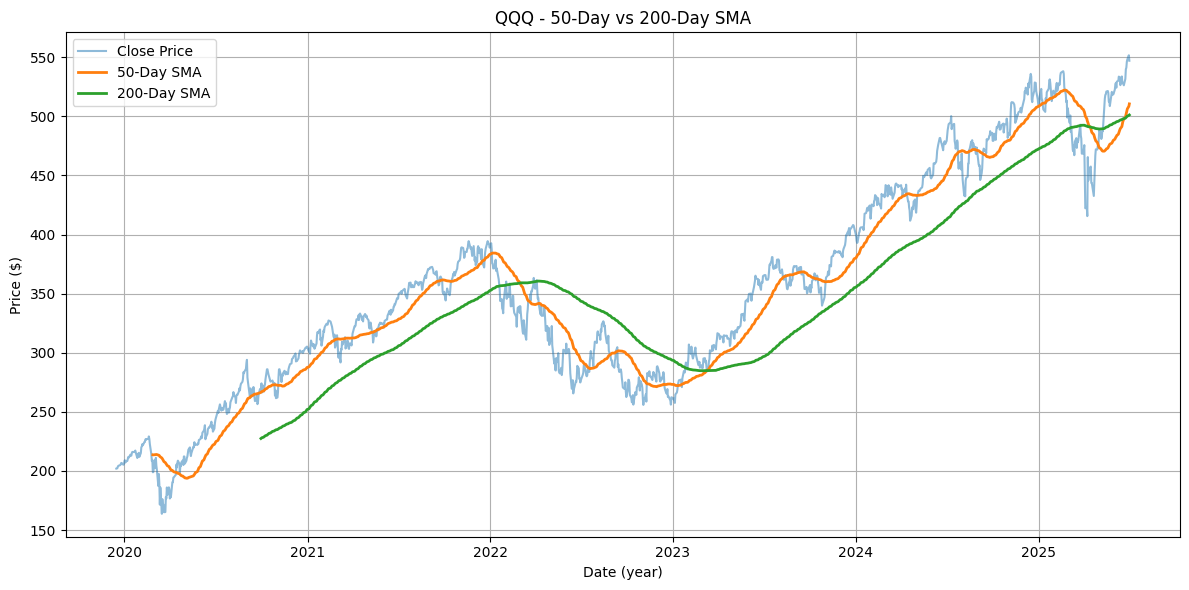

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: VOO

Current Price: $567.77

Returns:
1 Week Return: 1.80%
1 Month Return: 5.12%
3 Months Return: 9.75%
6 Months Return: 6.33%
1 Year Return: 14.73%
5 Years Return: 113.24%


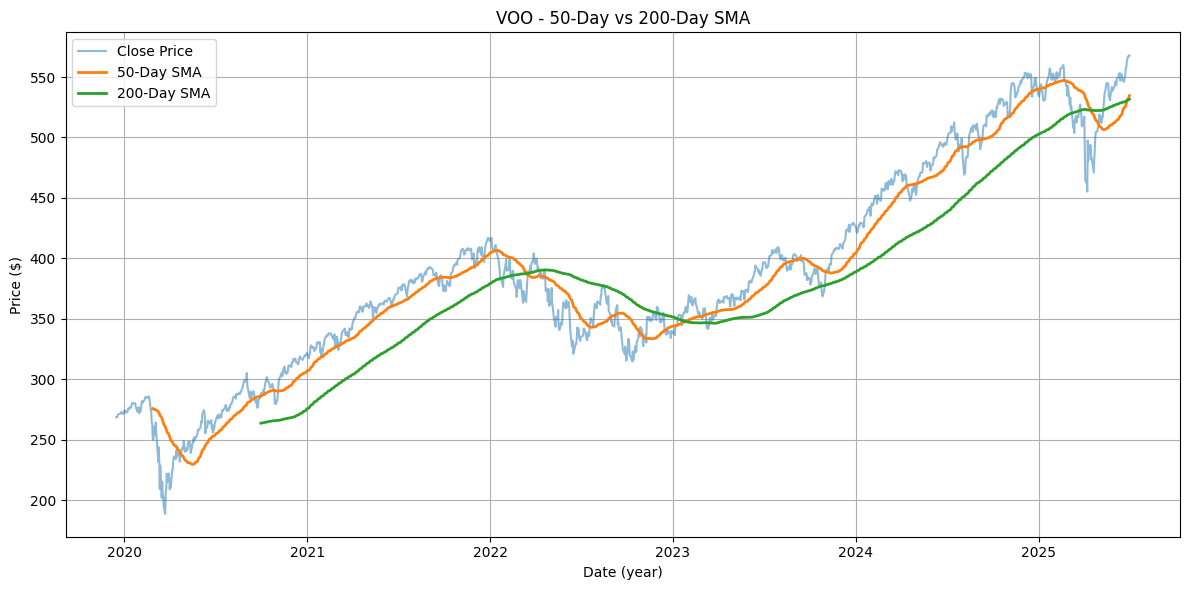

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: DIA

Current Price: $444.89

Returns:
1 Week Return: 3.27%
1 Month Return: 5.51%
3 Months Return: 5.85%
6 Months Return: 5.81%
1 Year Return: 15.14%
5 Years Return: 87.94%


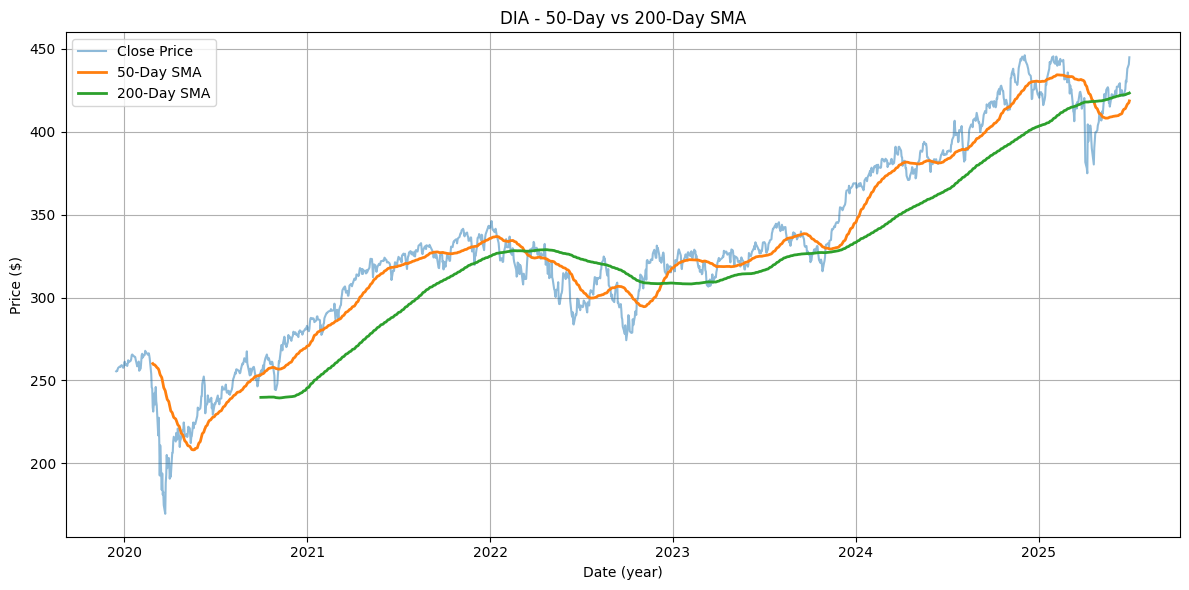

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: BRK-B

Current Price: $489.61

Returns:
1 Week Return: -0.78%
1 Month Return: -2.85%
3 Months Return: -8.95%
6 Months Return: 8.54%
1 Year Return: 20.83%
5 Years Return: 173.79%


/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: TQQQ

Current Price: $80.89

Returns:
1 Week Return: 3.86%
1 Month Return: 15.88%
3 Months Return: 35.35%
6 Months Return: 3.47%
1 Year Return: 9.14%
5 Years Return: 226.60%


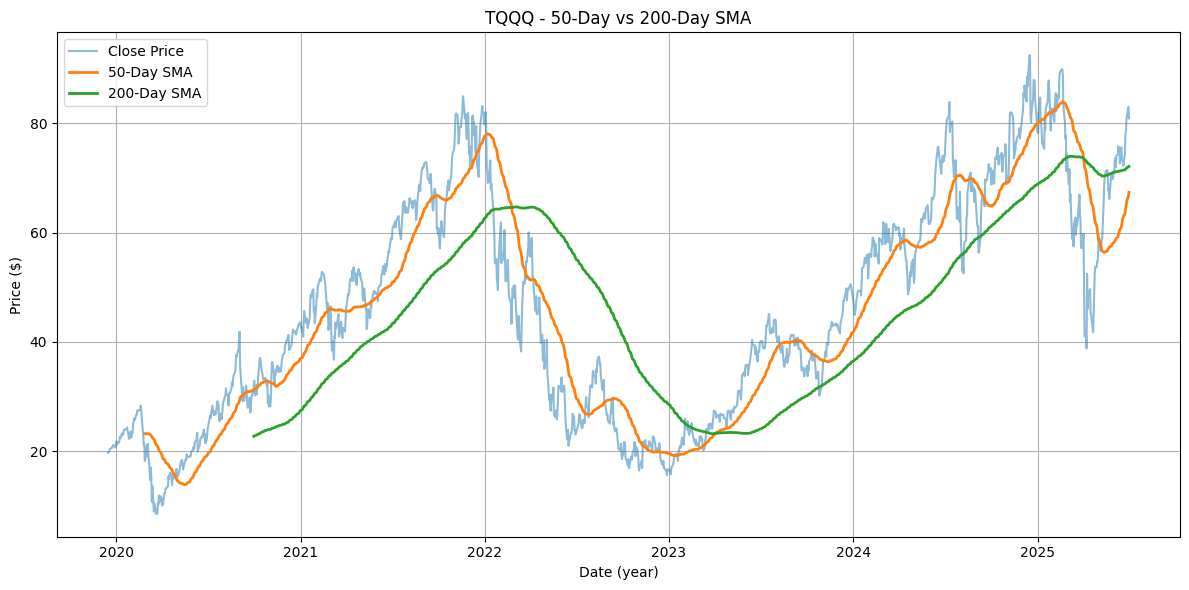

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: AMZN

Current Price: $220.46

Returns:
1 Week Return: 3.61%
1 Month Return: 7.54%
3 Months Return: 12.47%
6 Months Return: 0.11%
1 Year Return: 11.80%
5 Years Return: 52.55%


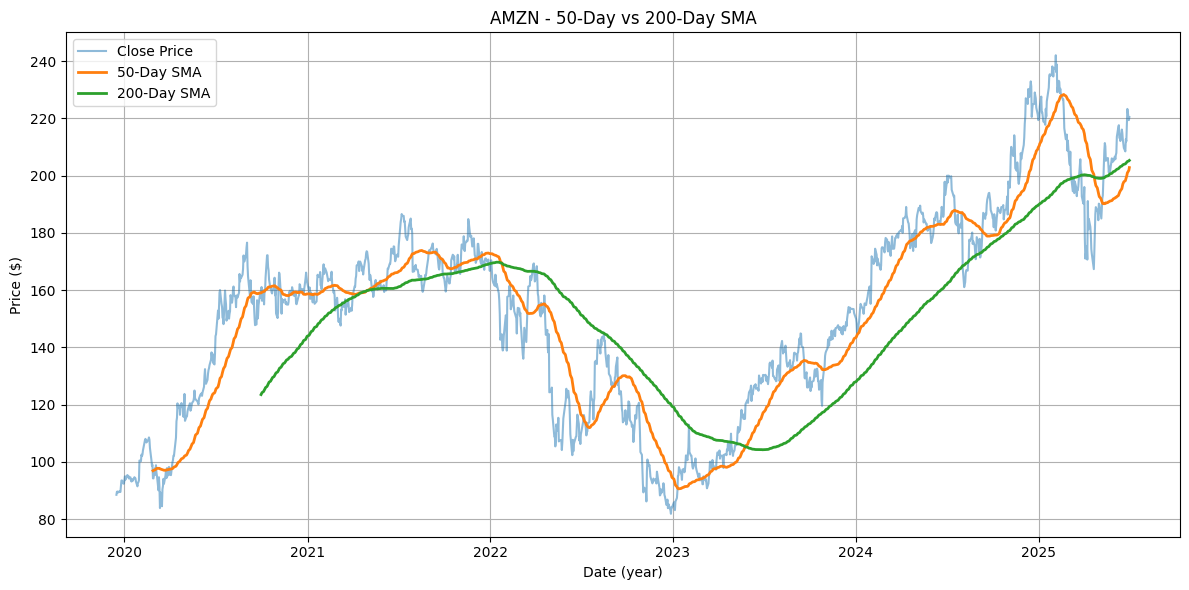

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: TSLA

Current Price: $300.71

Returns:
1 Week Return: -11.68%
1 Month Return: -13.20%
3 Months Return: 6.35%
6 Months Return: -20.72%
1 Year Return: 43.29%
5 Years Return: 273.19%


/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: VTI

Current Price: $303.93

Returns:
1 Week Return: 1.71%
1 Month Return: 5.16%
3 Months Return: 9.68%
6 Months Return: 5.76%
1 Year Return: 14.85%
5 Years Return: 106.85%


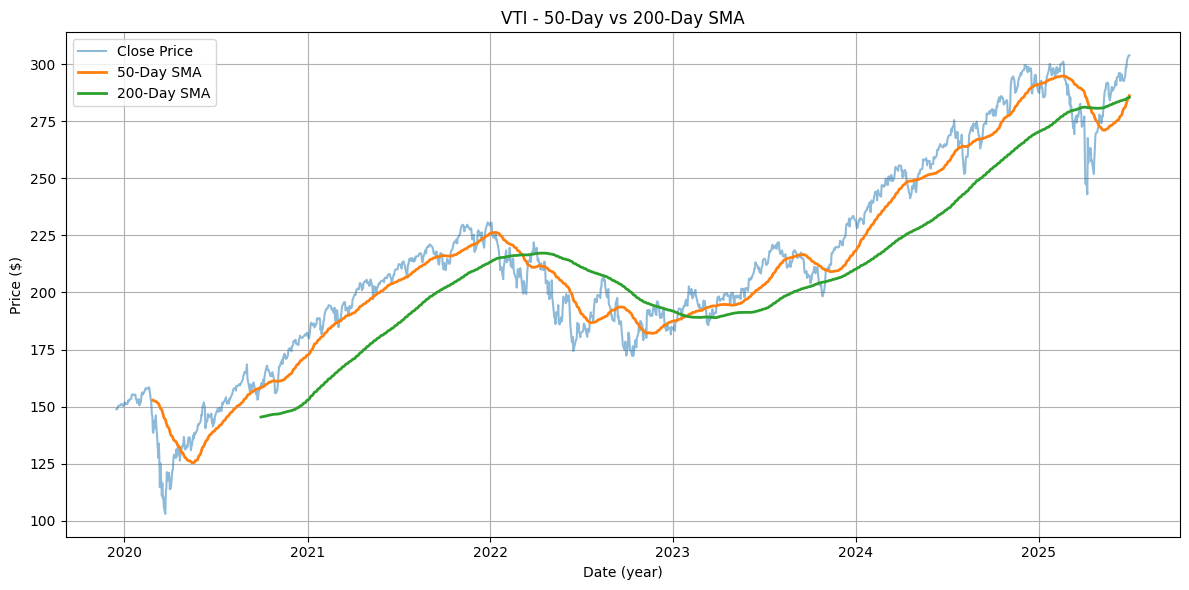

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: NVDA

Current Price: $153.30

Returns:
1 Week Return: 3.65%
1 Month Return: 13.45%
3 Months Return: 38.84%
6 Months Return: 10.86%
1 Year Return: 23.37%
5 Years Return: 1500.10%


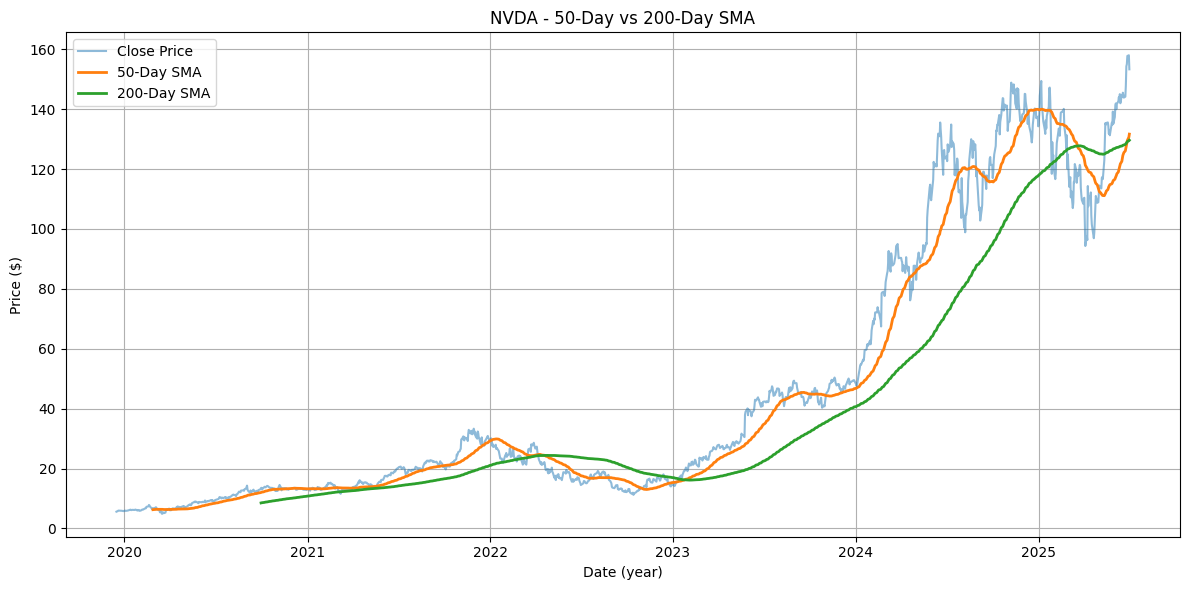

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: GOOGL

Current Price: $175.84

Returns:
1 Week Return: 5.44%
1 Month Return: 2.51%
3 Months Return: 12.11%
6 Months Return: -6.95%
1 Year Return: -3.44%
5 Years Return: 140.68%


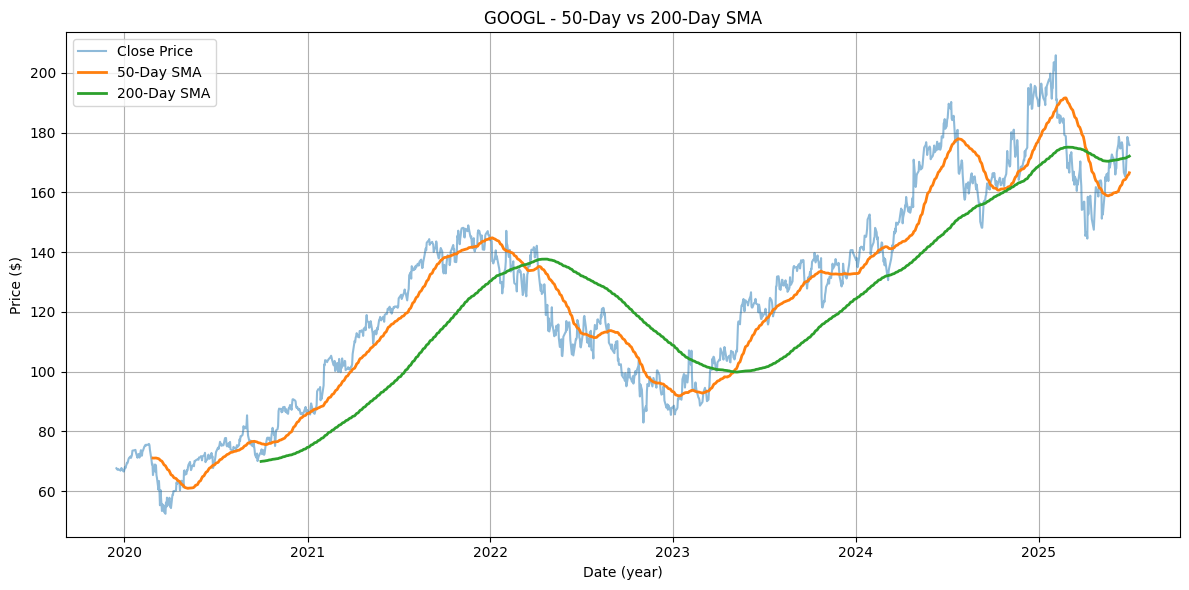

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: AAPL

Current Price: $207.82

Returns:
1 Week Return: 3.75%
1 Month Return: 3.47%
3 Months Return: -7.06%
6 Months Return: -14.57%
1 Year Return: -3.67%
5 Years Return: 134.86%


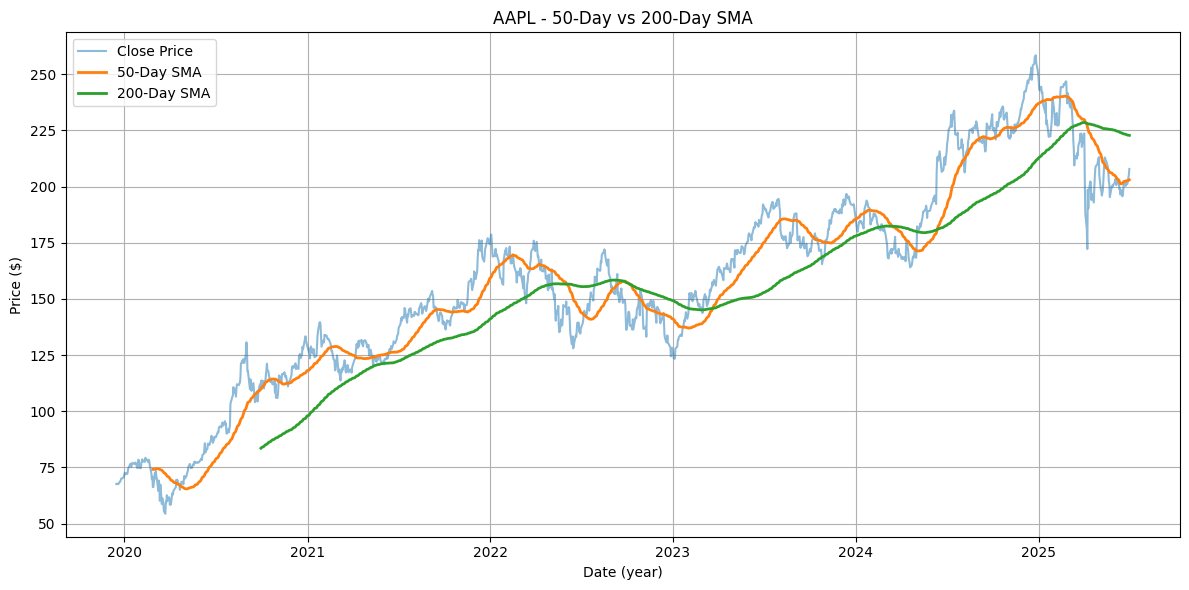

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: QBIG

Current Price: $32.20

Returns:
1 Week Return: 1.87%
1 Month Return: 6.26%
3 Months Return: 19.17%
6 Months Return: 2.09%
1 Year Return: Not enough data.
5 Years Return: Not enough data.


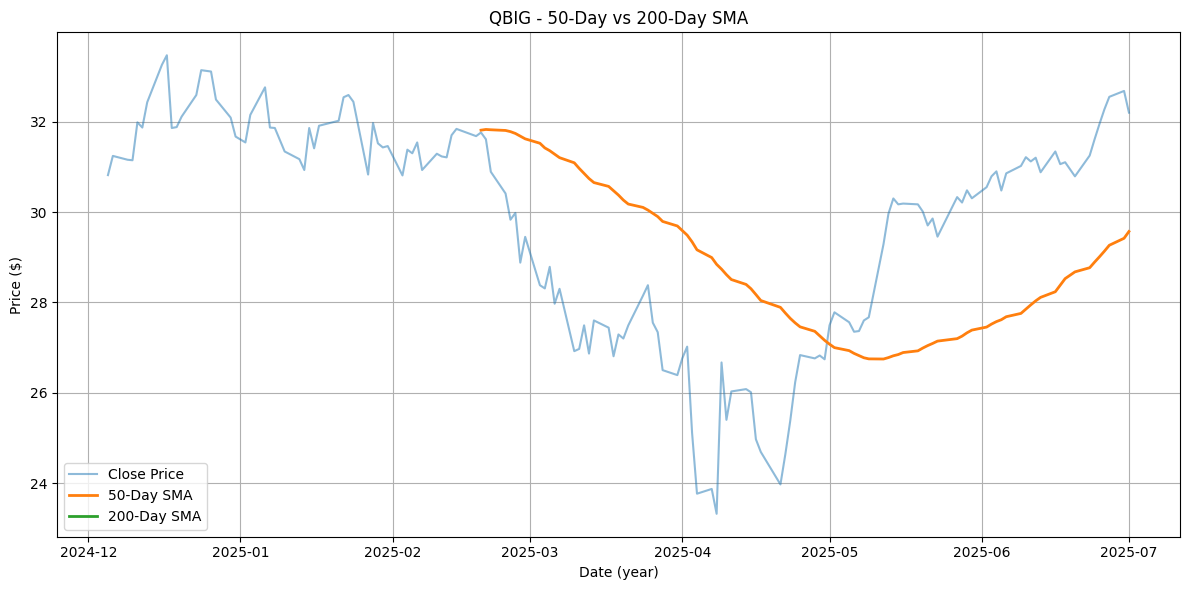

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: VB

Current Price: $239.44

Returns:
1 Week Return: 1.73%
1 Month Return: 5.28%
3 Months Return: 6.29%
6 Months Return: 0.49%
1 Year Return: 12.26%
5 Years Return: 76.80%


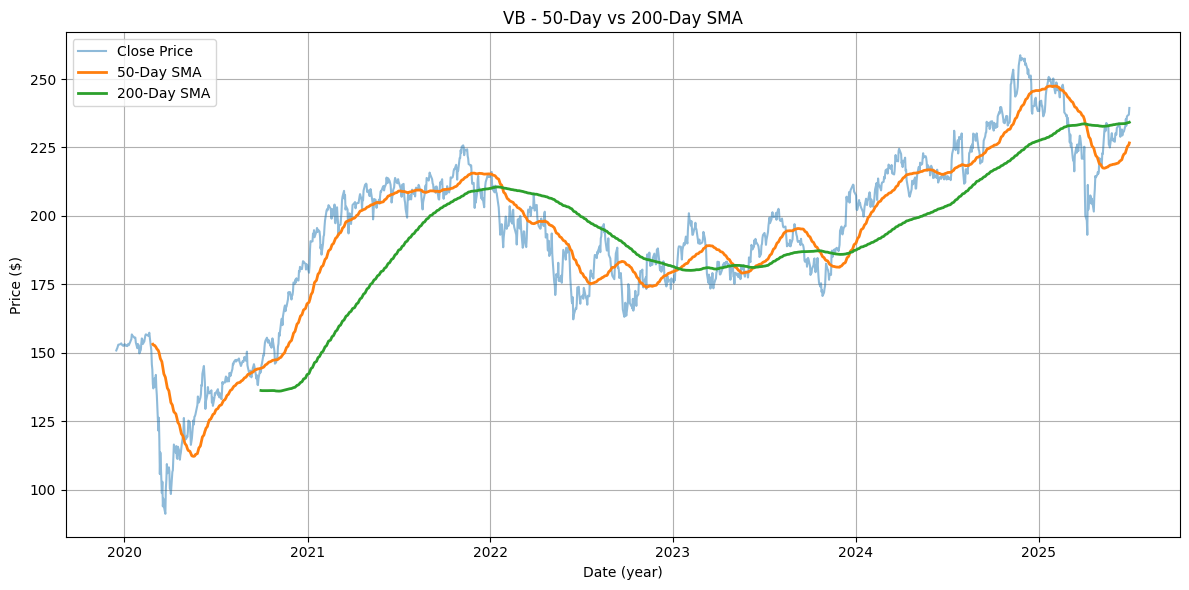

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: META

Current Price: $719.22

Returns:
1 Week Return: 0.99%
1 Month Return: 11.16%
3 Months Return: 23.26%
6 Months Return: 20.22%
1 Year Return: 43.00%
5 Years Return: 209.81%


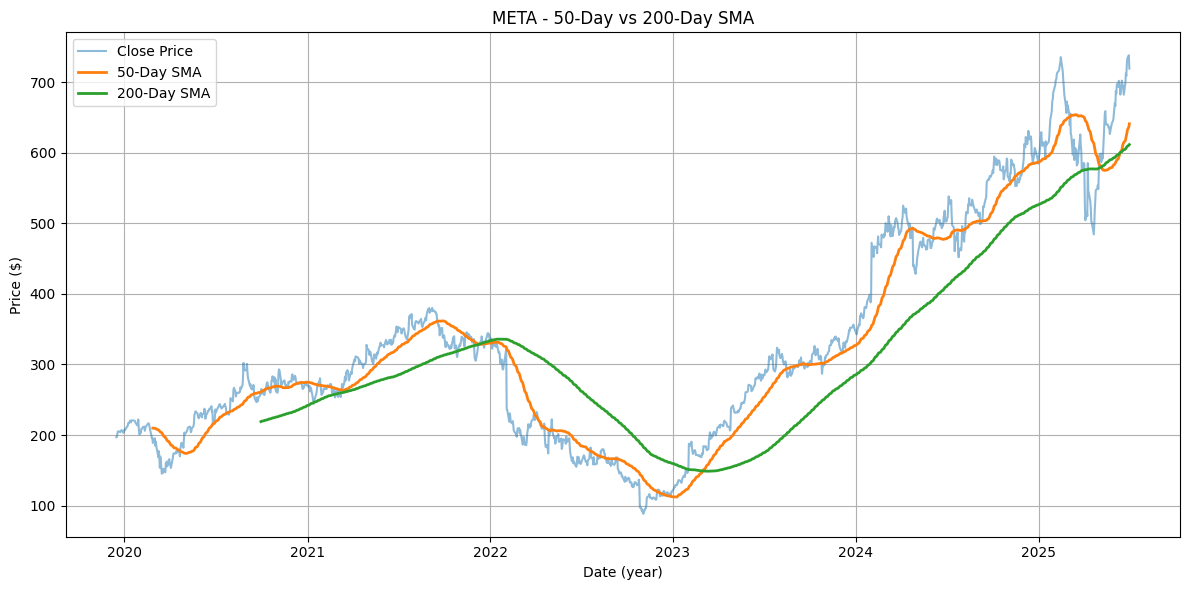

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: MSFT

Current Price: $492.05

Returns:
1 Week Return: 0.40%
1 Month Return: 6.88%
3 Months Return: 29.00%
6 Months Return: 18.00%
1 Year Return: 8.56%
5 Years Return: 148.99%


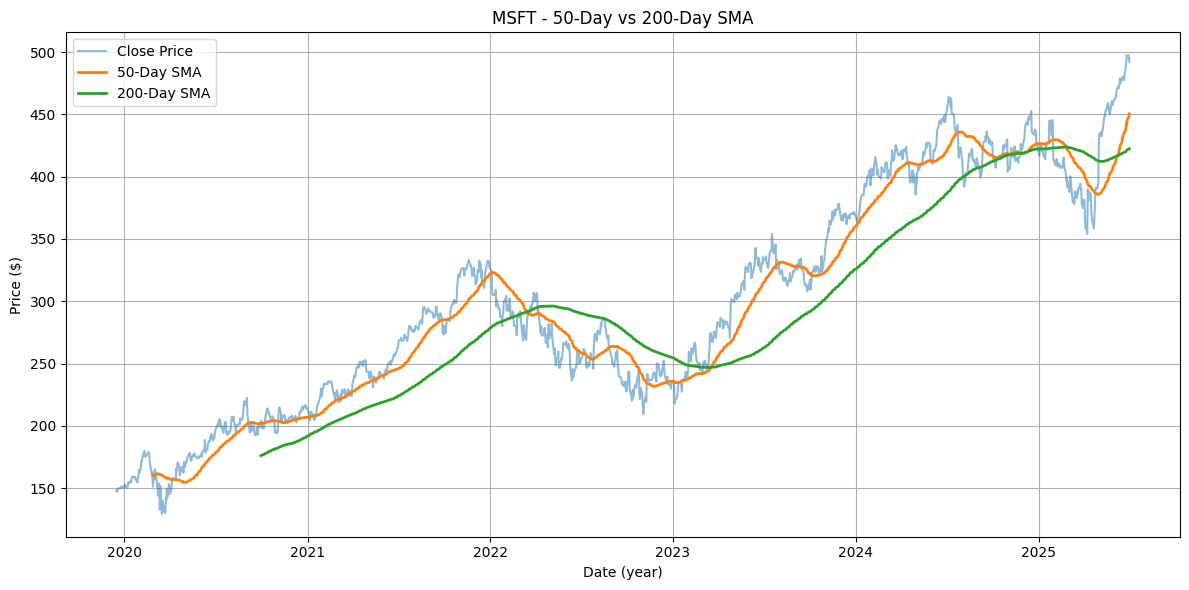

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: GS

Current Price: $706.46

Returns:
1 Week Return: 6.70%
1 Month Return: 17.66%
3 Months Return: 26.08%
6 Months Return: 24.09%
1 Year Return: 55.56%
5 Years Return: 303.50%


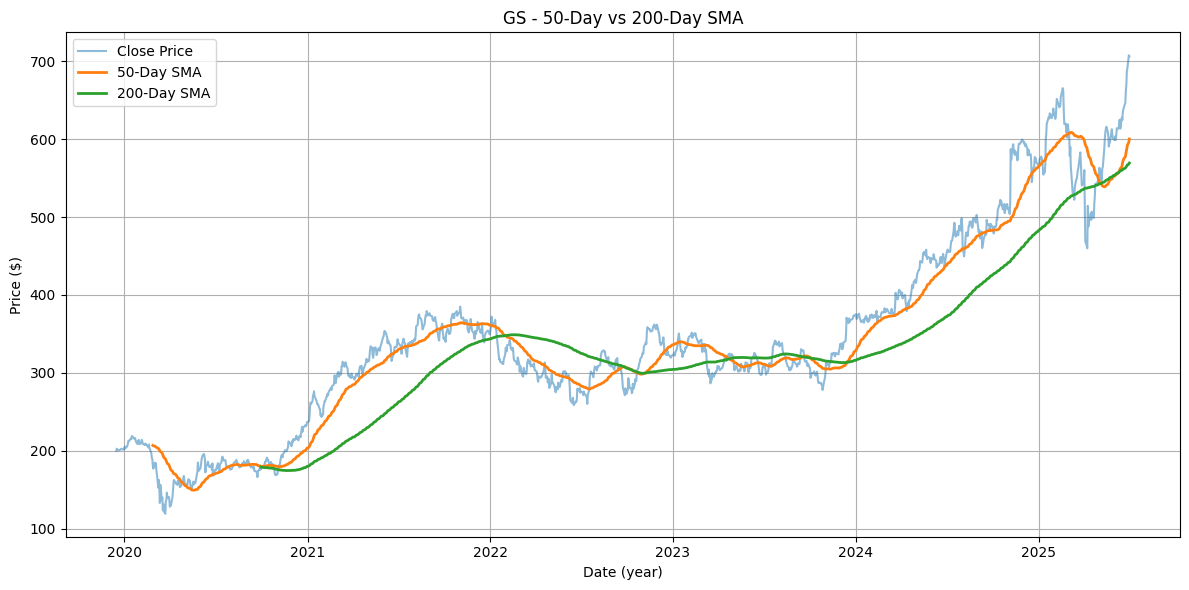

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: BLK

Current Price: $1054.27

Returns:
1 Week Return: 4.91%
1 Month Return: 8.16%
3 Months Return: 10.19%
6 Months Return: 4.74%
1 Year Return: 37.71%
5 Years Return: 115.74%


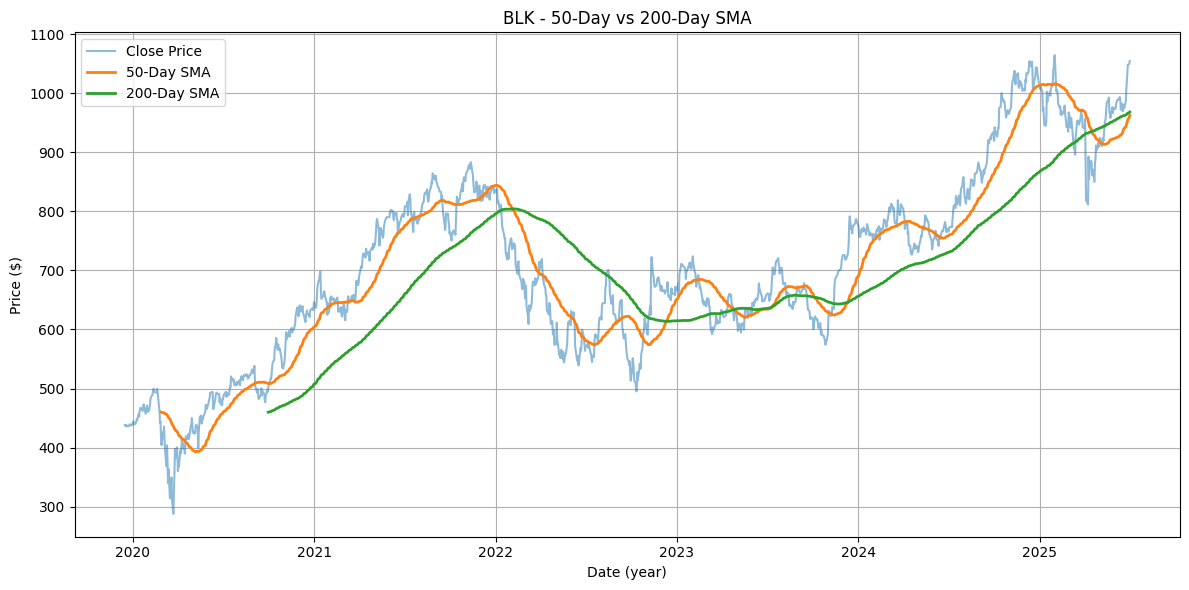

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: JPM

Current Price: $290.41

Returns:
1 Week Return: 3.25%
1 Month Return: 10.00%
3 Months Return: 18.87%
6 Months Return: 22.38%
1 Year Return: 44.63%
5 Years Return: 256.70%


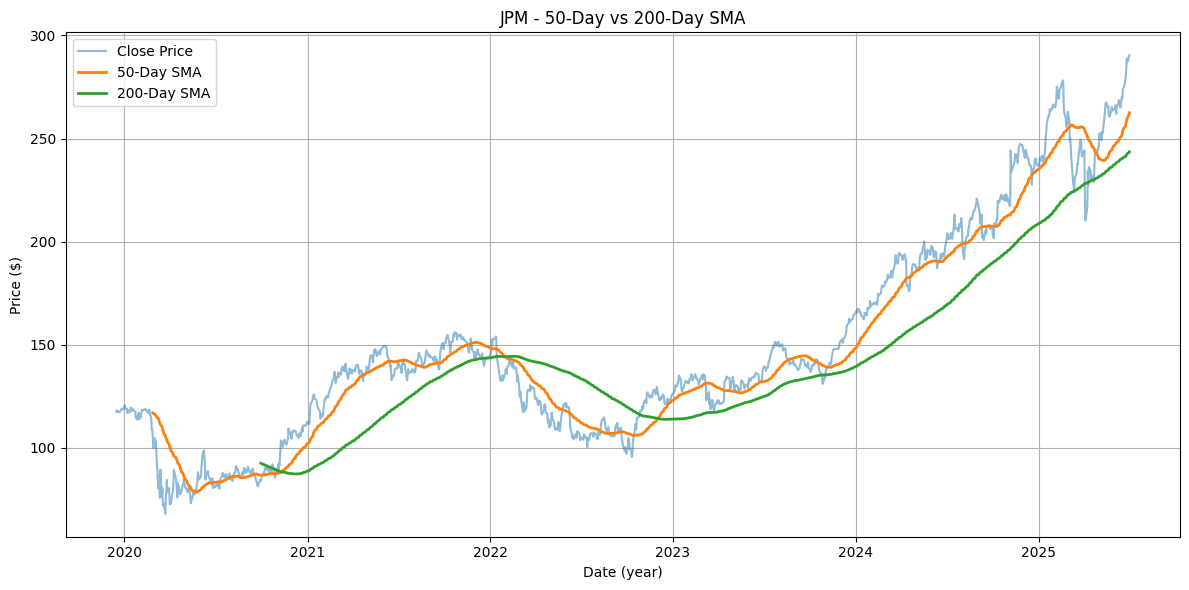

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: COST

Current Price: $985.96

Returns:
1 Week Return: -1.59%
1 Month Return: -5.21%
3 Months Return: 2.30%
6 Months Return: 8.63%
1 Year Return: 17.19%
5 Years Return: 250.20%


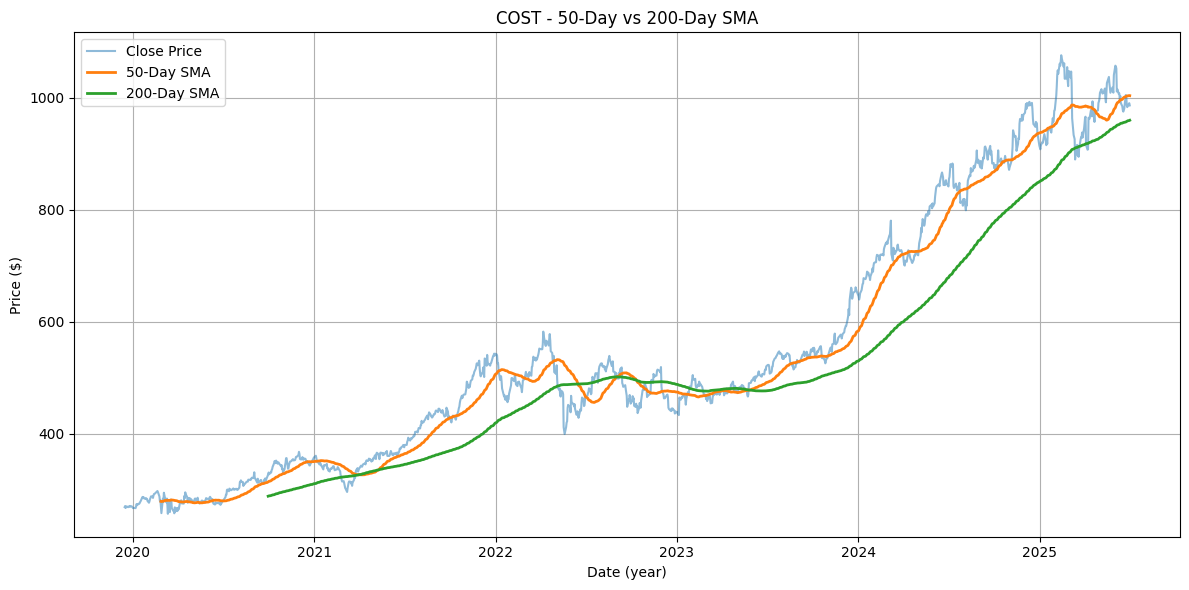

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: SOFI

Current Price: $17.64

Returns:
1 Week Return: 11.29%
1 Month Return: 32.63%
3 Months Return: 43.30%
6 Months Return: 24.84%
1 Year Return: 174.34%
5 Years Return: Not enough data.


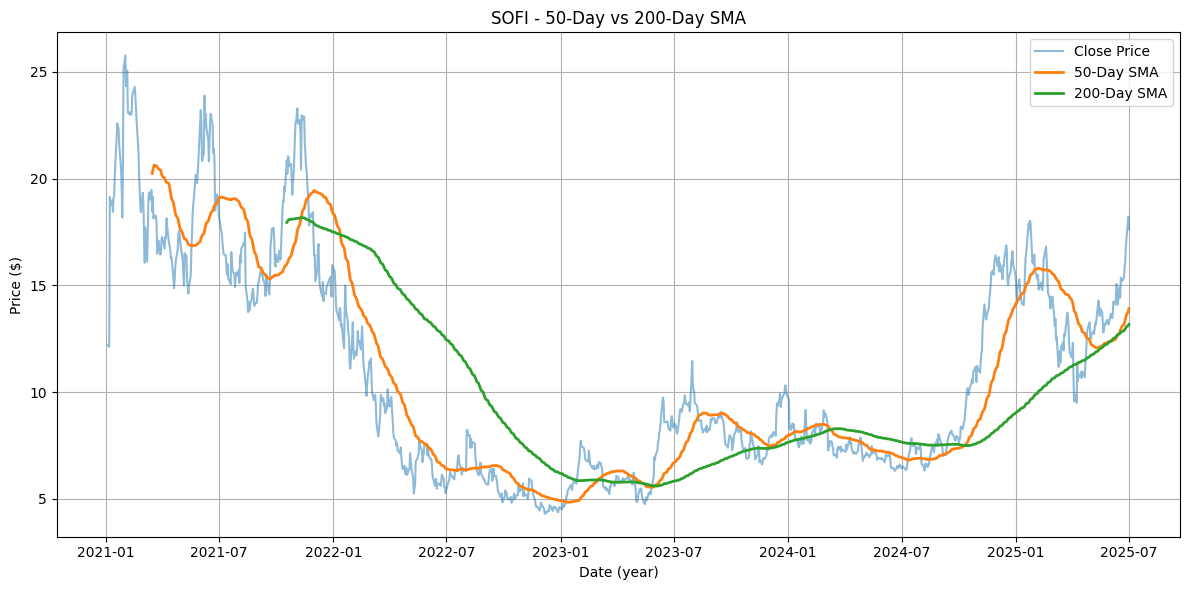

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: IBIT

Current Price: $59.84

Returns:
1 Week Return: -0.37%
1 Month Return: 0.64%
3 Months Return: 21.11%
6 Months Return: 8.07%
1 Year Return: 66.22%
5 Years Return: Not enough data.


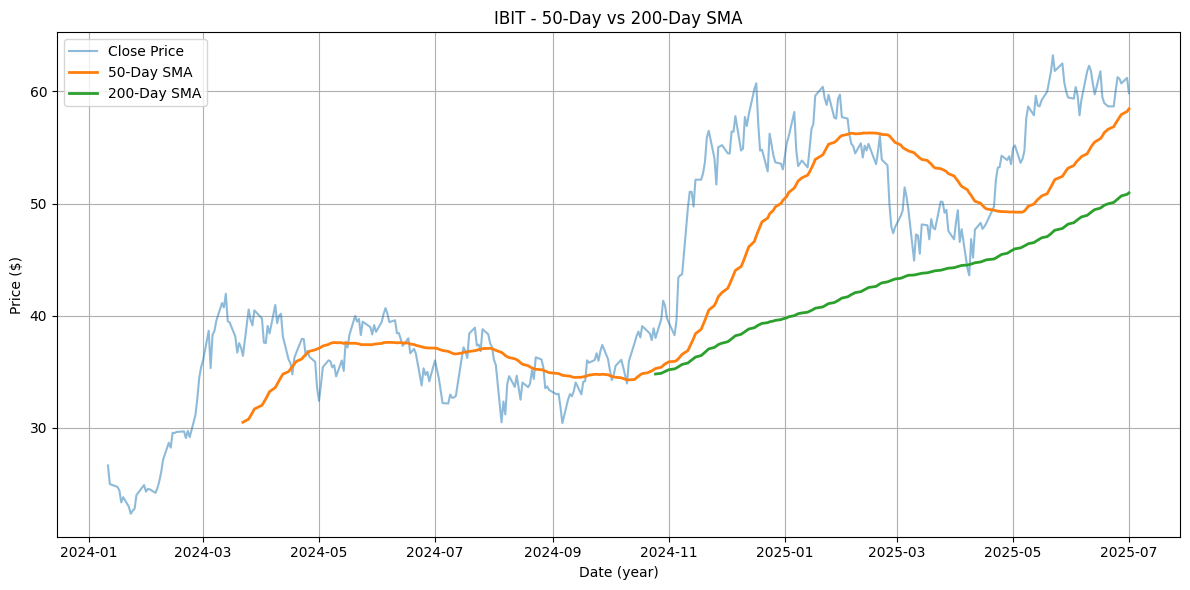

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: BITO

Current Price: $20.27

Returns:
1 Week Return: -4.16%
1 Month Return: -3.54%
3 Months Return: 15.23%
6 Months Return: 1.17%
1 Year Return: 50.29%
5 Years Return: Not enough data.


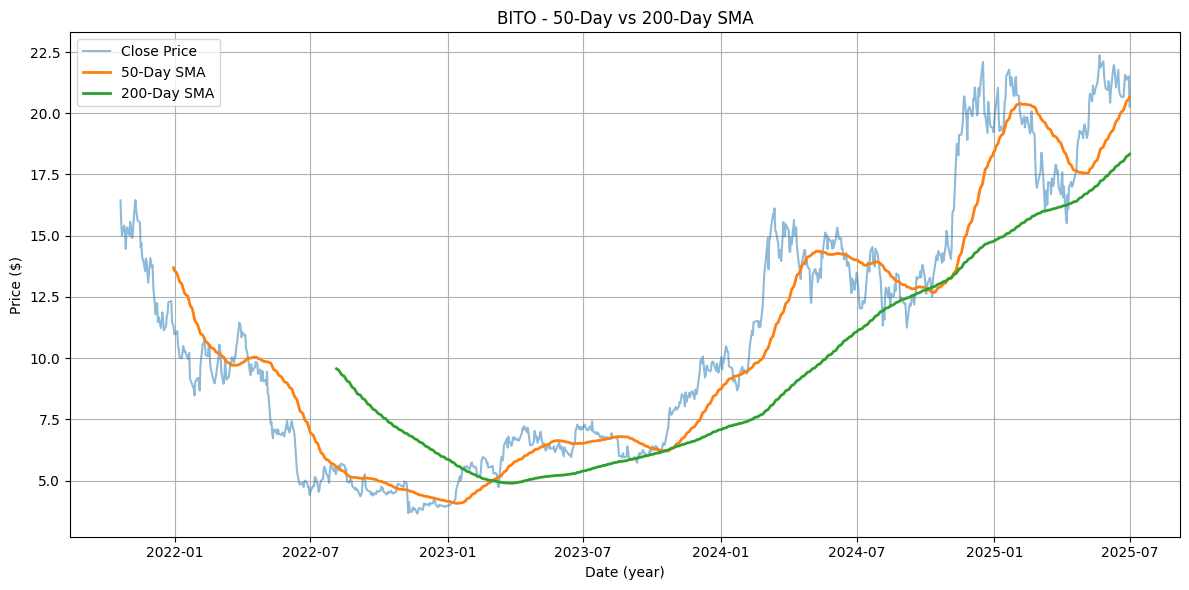

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: PTON

Current Price: $6.60

Returns:
1 Week Return: 0.15%
1 Month Return: -7.04%
3 Months Return: 4.60%
6 Months Return: -25.25%
1 Year Return: 103.08%
5 Years Return: -88.84%


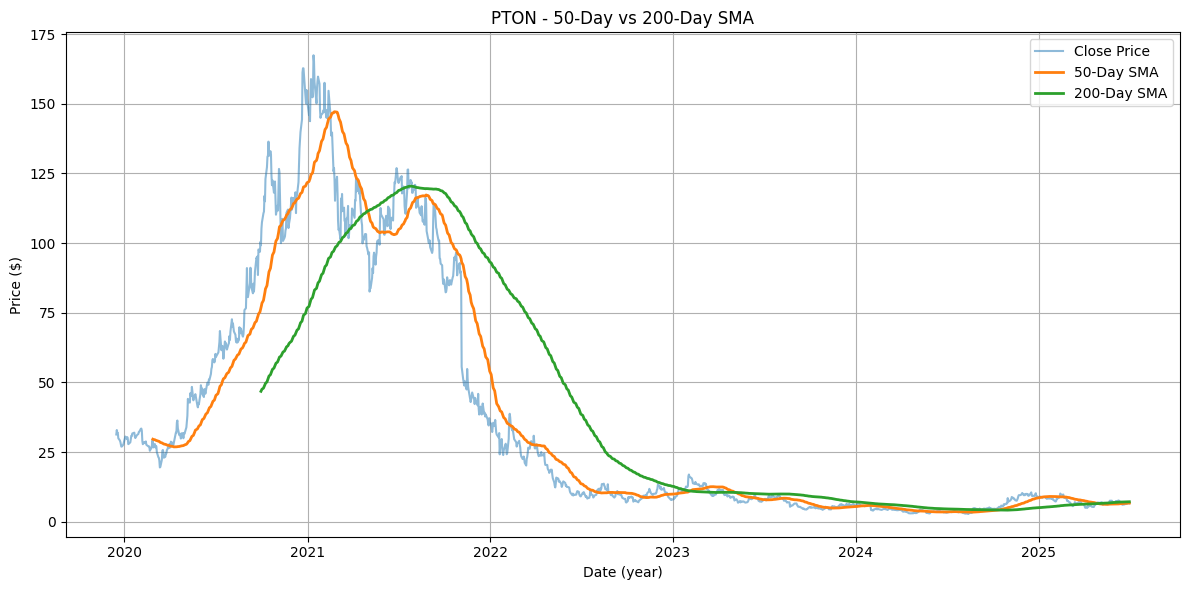

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: YETI

Current Price: $32.93

Returns:
1 Week Return: 6.57%
1 Month Return: 7.76%
3 Months Return: -5.16%
6 Months Return: -12.23%
1 Year Return: -10.86%
5 Years Return: -22.79%


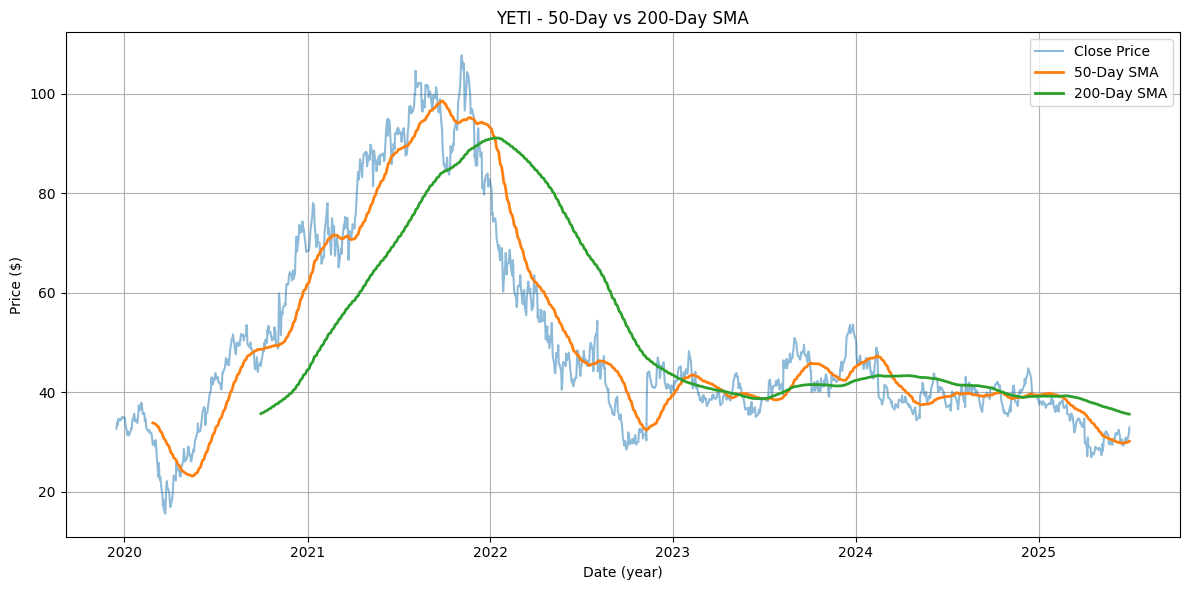

/tmp/ipython-input-20-3387616793.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-20-3387616793.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-20-3387616793.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: VNQ

Current Price: $89.71

Returns:
1 Week Return: -0.91%
1 Month Return: 1.42%
3 Months Return: -0.59%
6 Months Return: 3.66%
1 Year Return: 12.31%
5 Years Return: 35.52%


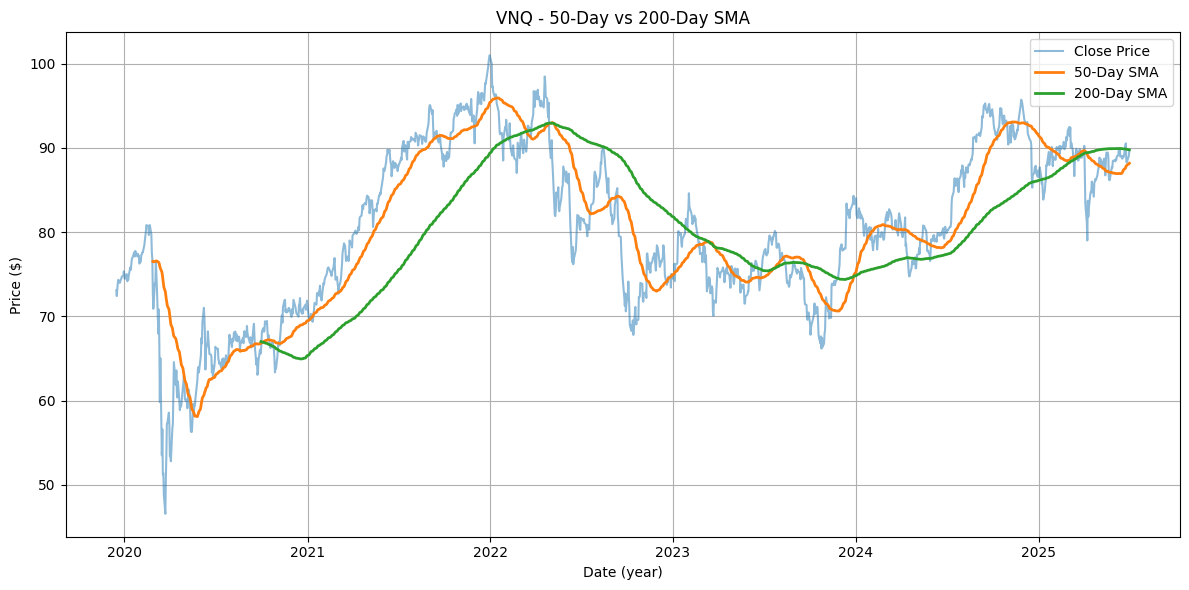

In [21]:
# ========================
# INPUT STOCK TICKERS HERE
# ========================
tickers = ['QQQ', 'VOO', 'DIA', 'BRK-B', 'TQQQ', 'AMZN', 'TSLA', 'VTI', 'NVDA', 'GOOGL', 'AAPL', 'QBIG', 'VB', 'META', 'MSFT', 'GS', 'BLK', 'JPM', 'COST',
           'SOFI', 'IBIT', 'BITO', 'PTON', 'YETI', 'VNQ']  # ← Add or remove tickers here

# Call the function to analyze each stock
for ticker in tickers:
    analyze_stock(ticker)

In [22]:
# ------------------------------------------------------------------------------------------------------------
# A simple backtest model using Golden Cross & Death Cross signals and comparing them to "Buy and Hold" method
# ------------------------------------------------------------------------------------------------------------

print("A simple backtest model using the Golden Cross & Death Cross signals and comparing it to the 'Buy & Hold' method.")
print("\nSimulate entering(buying) and exiting(selling) positions based on crossover signals.")
print("\nWhen the 50-day SMA crosses higher than the 200-day SMA, this is known as the Golden Cross and it symbolizes a bullish outlook.")
print("\nWhen the 50-day SMA crosses lower than the 200-day SMA, this is known as the Death Cross and it symbolizes a bearish outlook.")
print("\nA Golden Cross is typically a good sign to buy, and a Death Cross is known as a good time to sell.")
print("\nComparing the backtest model vs the 'Buy and Hold' method.")

# ---------------
# Import packages
# ---------------
import yfinance as yf                     # Download stock data from Yahoo Finance
import pandas as pd                       # Pandas library for data manipulation
import matplotlib.pyplot as plt           # Plotting
from datetime import datetime, timedelta  # For handling date ranges

# -------------------
# Download stock data
# -------------------
def get_data(ticker):

    # Define date range
    end = datetime.today()  # Today
    start = end - timedelta(days=5*365 + 200)  # Last 5 years + 200 days for SMA calculation buffer

    # DataFrame
    df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
    return df

# -------------------------------------------
# Generate Golden Cross / Death Cross signals
# -------------------------------------------
def generate_signals(df):

    # Calculate the SMAs
    df['SMA_50'] = df['Close'].rolling(window=50).mean()    # 50 day
    df['SMA_200'] = df['Close'].rolling(window=200).mean()  # 200 day

    df.dropna(inplace=True) # Drop rows where SMAs are not yet available (i.e., NaN values)

    # Create a trading signal column:
    df['Signal'] = 0                                    # Signal = 0 when SMA_50 <= SMA_200 → Death Cross (exit/neutral)
    df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1  # Signal = 1 when SMA_50 > SMA_200 → Golden Cross (buy/long)

    df['Position'] = df['Signal'].shift(1)              # Shift the signal forward by 1 day to avoid lookahead bias (don't want to trade on the same day the signal is calculated)
    df.dropna(inplace=True)                             # Drop any new NaNs created by the shift
    return df

# --------------------------------------------------------------
# Backtest the strategy and compare to the "Buy & Hold" strategy
# --------------------------------------------------------------
def backtest(df):

    # Calculate daily return of the stock
    df['Daily Return'] = df['Close'].pct_change()

    # Strategy return: only earn daily return when position is 1 (in the market)
    df['Strategy Return'] = df['Position'] * df['Daily Return']

    # Cumulative returns starting from 1 (i.e., 100%)
    df['Portfolio Cumulative'] = (1 + df['Strategy Return']).cumprod()
    df['Buy & Hold Cumulative'] = (1 + df['Daily Return']).cumprod()

    # Calculate final cumulative returns in percent
    strategy_total_return = (df['Portfolio Cumulative'].iloc[-1] - 1) * 100
    bh_total_return = (df['Buy & Hold Cumulative'].iloc[-1] - 1) * 100

    # Print results as percentages
    print(f"\nBacktest Results:")
    print(f"Strategy Total Return: {strategy_total_return:.2f}%")
    print(f"Buy & Hold Return: {bh_total_return:.2f}%")

    # Plot cumulative returns over time
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Portfolio Cumulative'], label='Strategy', linewidth=2)
    plt.plot(df.index, df['Buy & Hold Cumulative'], label='Buy & Hold', linestyle='--')
    plt.title("Cumulative Returns: Strategy vs Buy & Hold")
    plt.xlabel("Date")
    plt.ylabel("Growth (Start = 1.0)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Full analysis pipeline
def run_quant_model(ticker):
    print(f"\n\nRunning backtest for {ticker}")
    df = get_data(ticker)
    if df.empty:
        print("No data found.")
        return
    df = generate_signals(df)
    if df.empty:
        print("Not enough data after generating signals.")
        return
    backtest(df)

A simple backtest model using the Golden Cross & Death Cross signals and comparing it to the 'Buy & Hold' method.

Simulate entering(buying) and exiting(selling) positions based on crossover signals.

When the 50-day SMA crosses higher than the 200-day SMA, this is known as the Golden Cross and it symbolizes a bullish outlook.

When the 50-day SMA crosses lower than the 200-day SMA, this is known as the Death Cross and it symbolizes a bearish outlook.

A Golden Cross is typically a good sign to buy, and a Death Cross is known as a good time to sell.

Comparing the backtest model vs the 'Buy and Hold' method.


/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for QQQ



Backtest Results:
Strategy Total Return: 104.91%
Buy & Hold Return: 99.57%


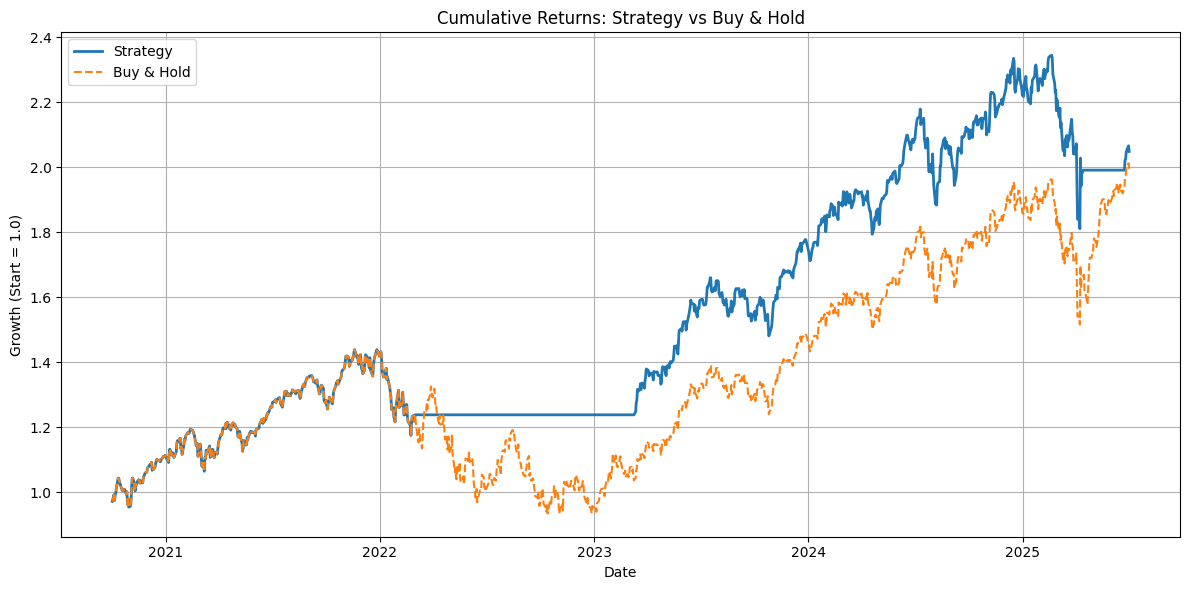

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for VOO



Backtest Results:
Strategy Total Return: 77.62%
Buy & Hold Return: 96.71%


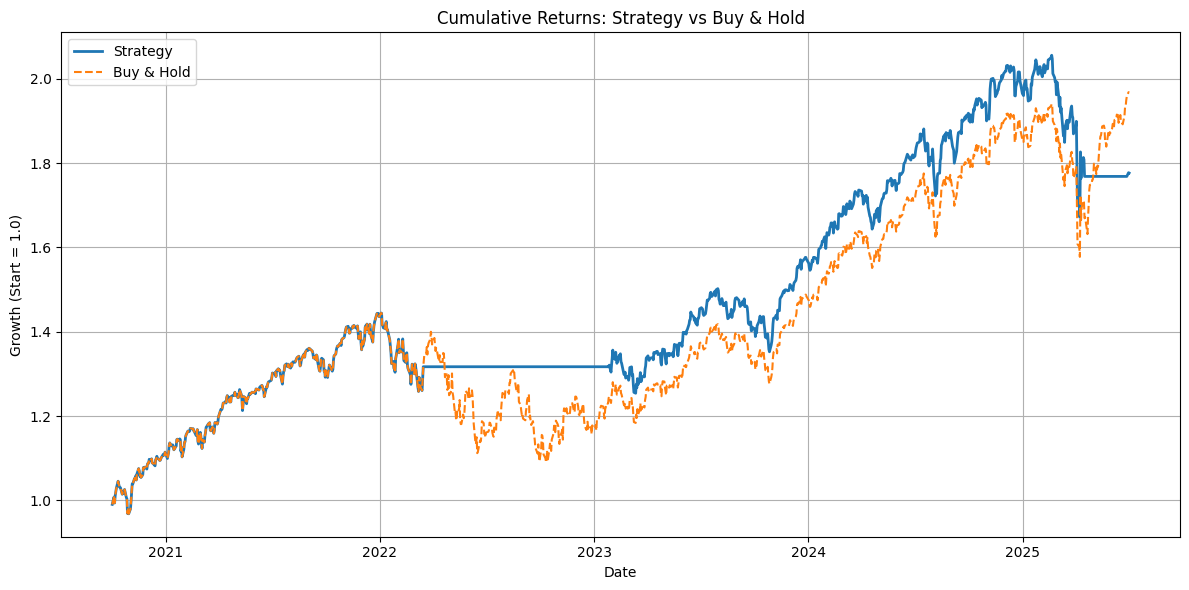



Running backtest for DIA


/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: 45.50%
Buy & Hold Return: 73.68%


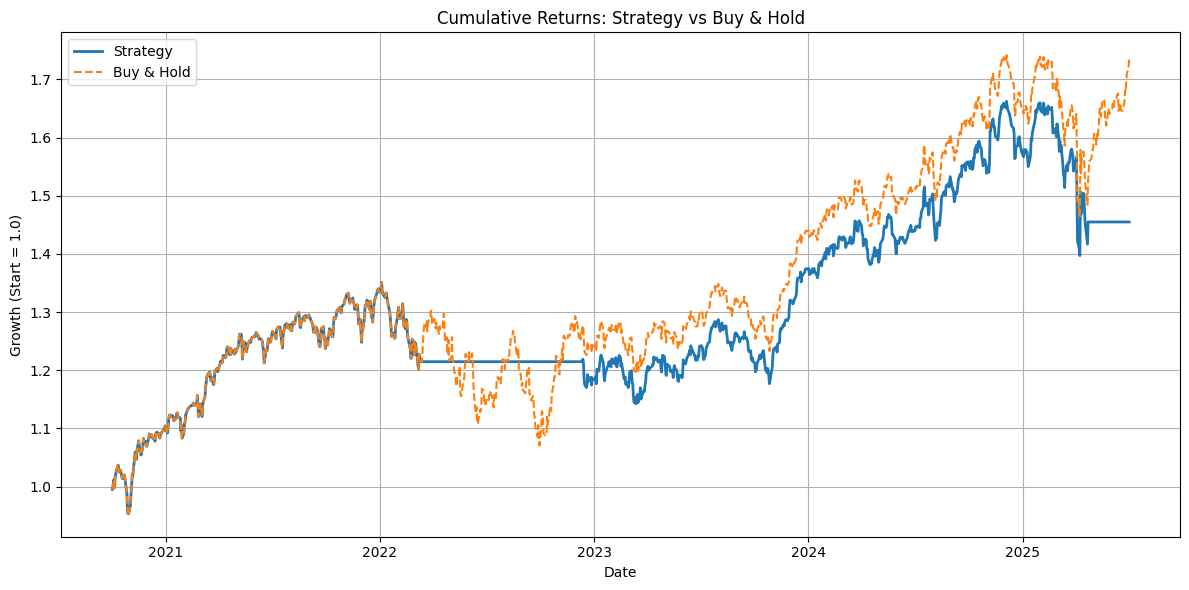



Running backtest for BRK-B


/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: 107.78%
Buy & Hold Return: 130.93%




Running backtest for TQQQ


/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: 178.29%
Buy & Hold Return: 146.19%


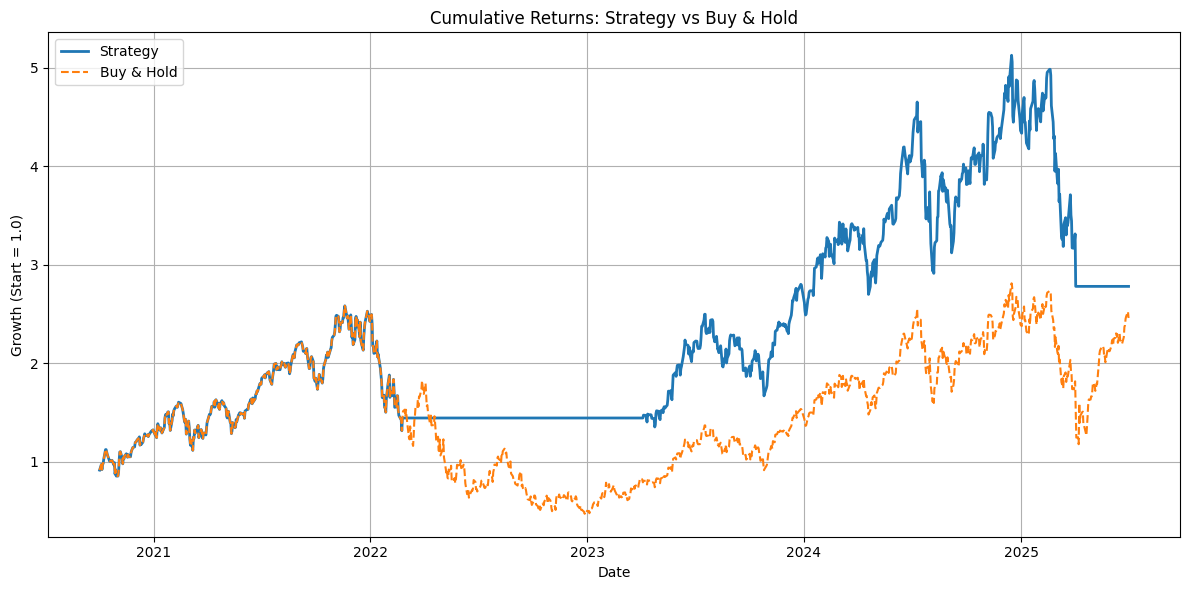

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for AMZN

Backtest Results:
Strategy Total Return: 21.73%
Buy & Hold Return: 36.88%


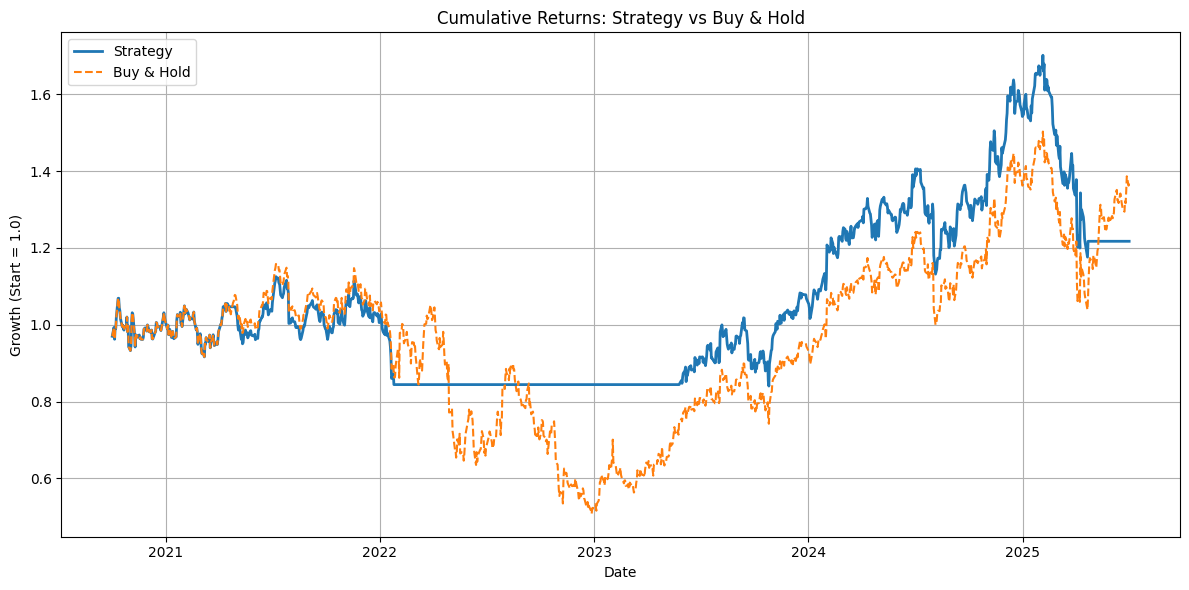

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for TSLA

Backtest Results:
Strategy Total Return: 13.58%
Buy & Hold Return: 101.30%


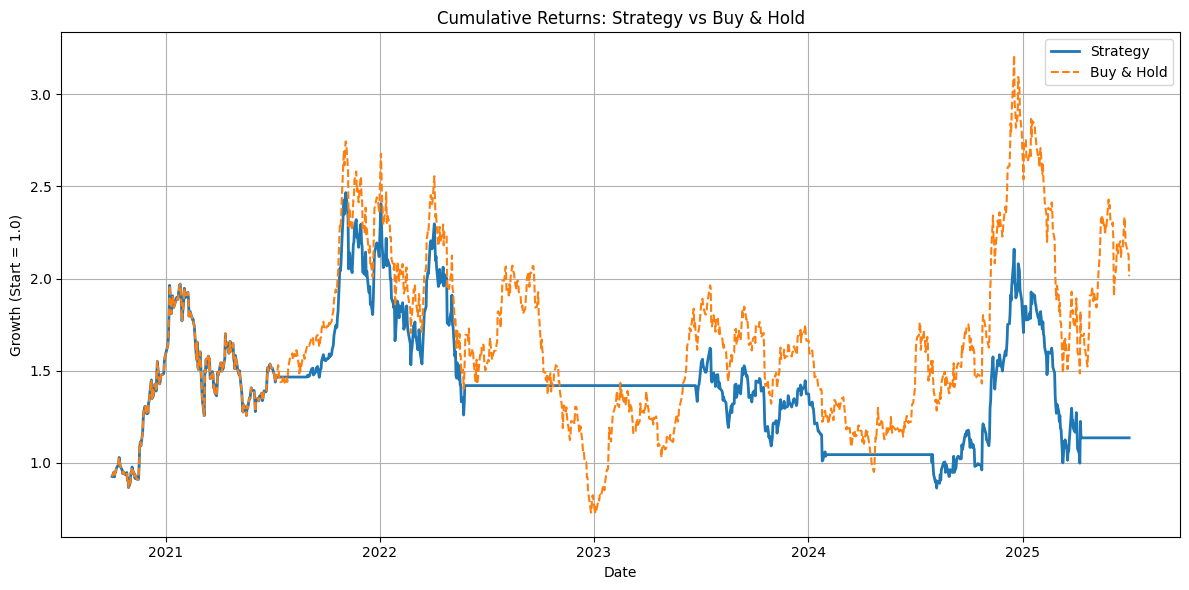

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for VTI

Backtest Results:
Strategy Total Return: 67.16%
Buy & Hold Return: 89.61%


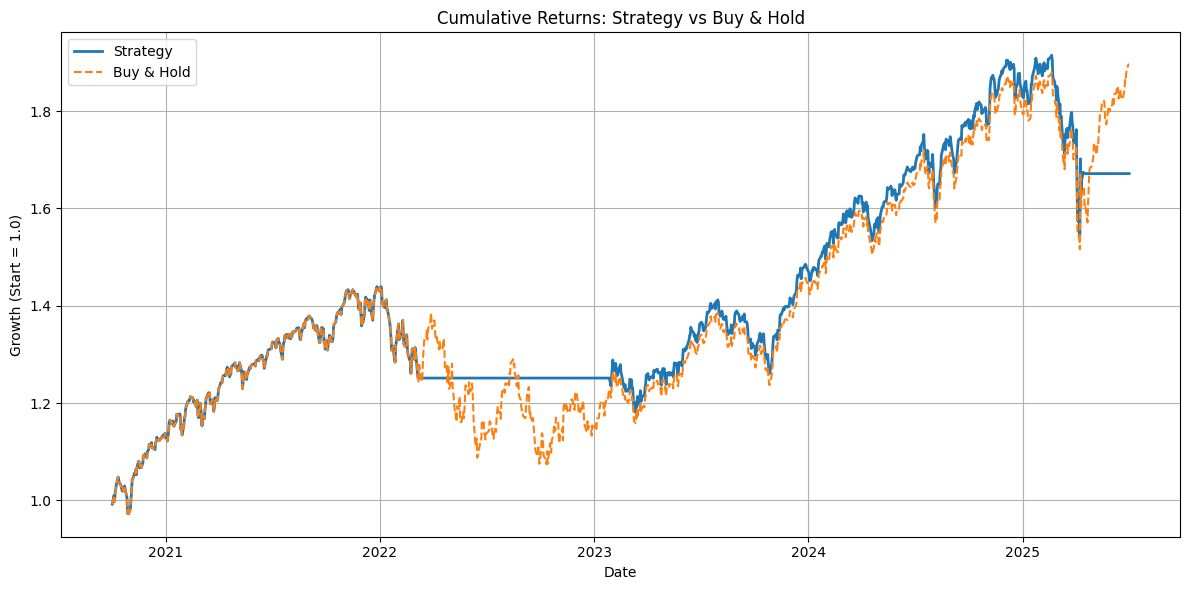

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for NVDA

Backtest Results:
Strategy Total Return: 845.46%
Buy & Hold Return: 1029.38%


/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for GOOGL

Backtest Results:
Strategy Total Return: 147.36%
Buy & Hold Return: 137.78%


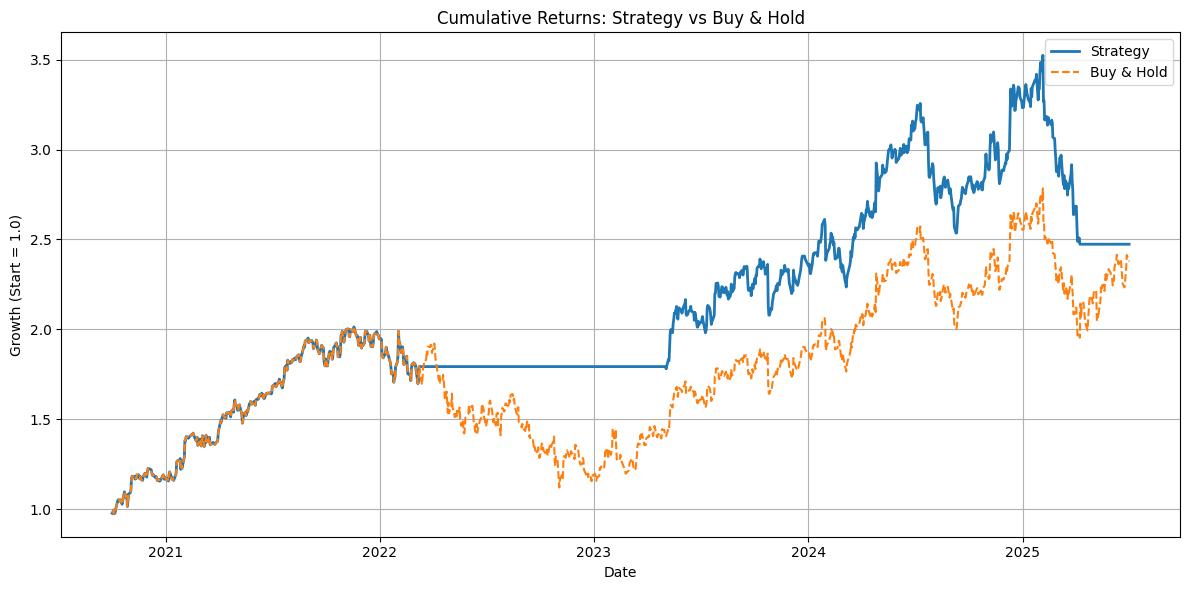

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for AAPL



Backtest Results:
Strategy Total Return: 9.47%
Buy & Hold Return: 82.73%


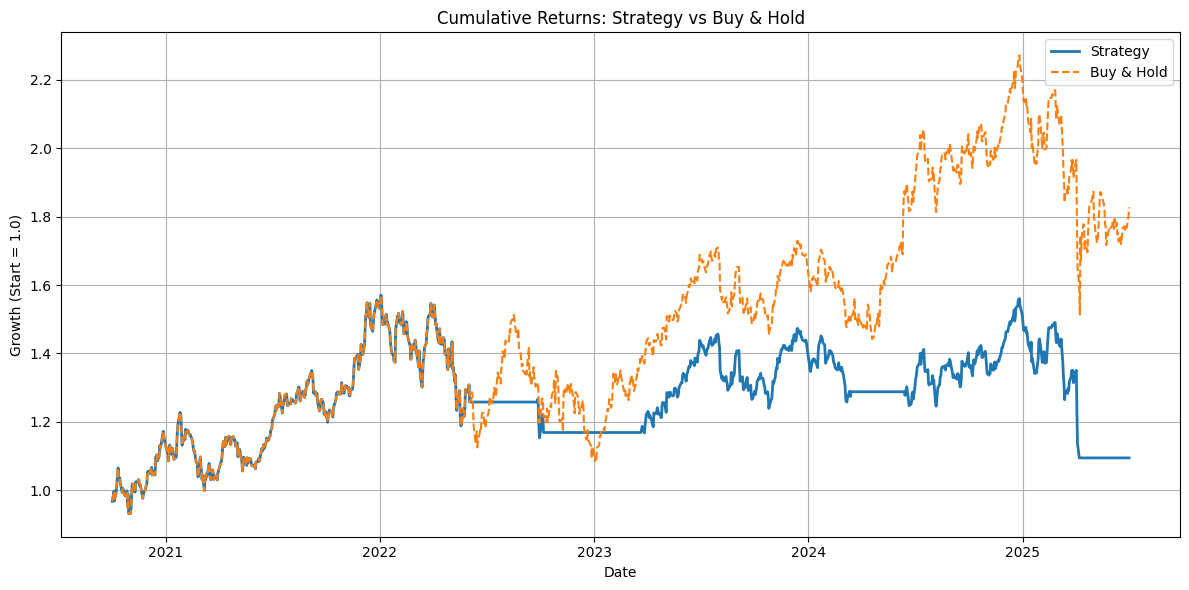

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for QBIG
Not enough data after generating signals.


Running backtest for VB



/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: 9.48%
Buy & Hold Return: 64.75%


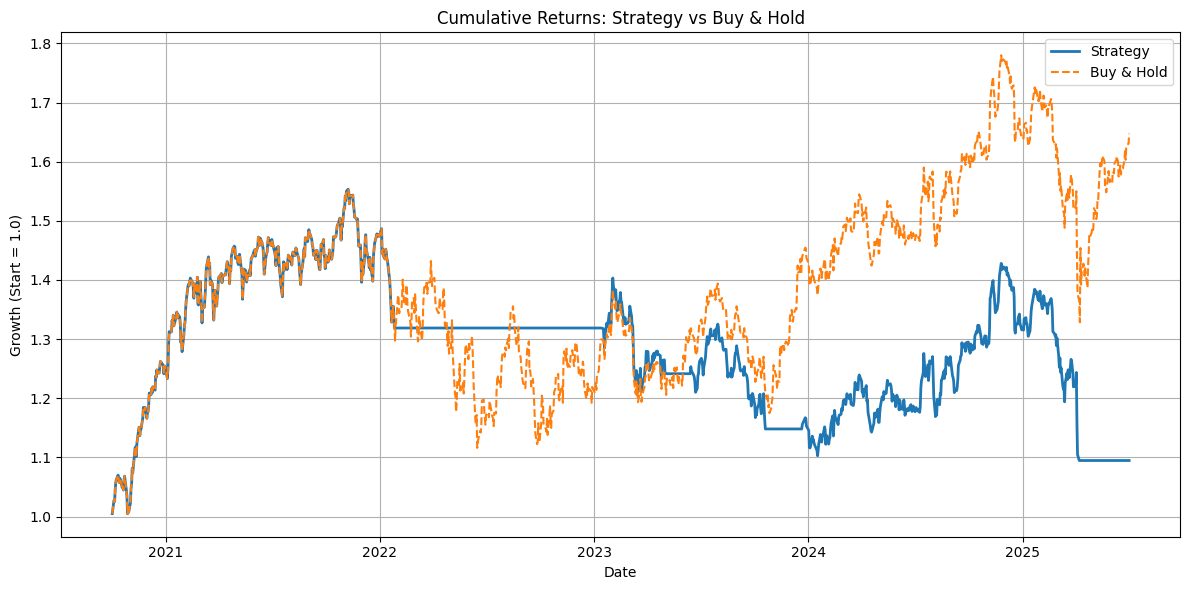

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for META

Backtest Results:
Strategy Total Return: 328.32%
Buy & Hold Return: 171.22%


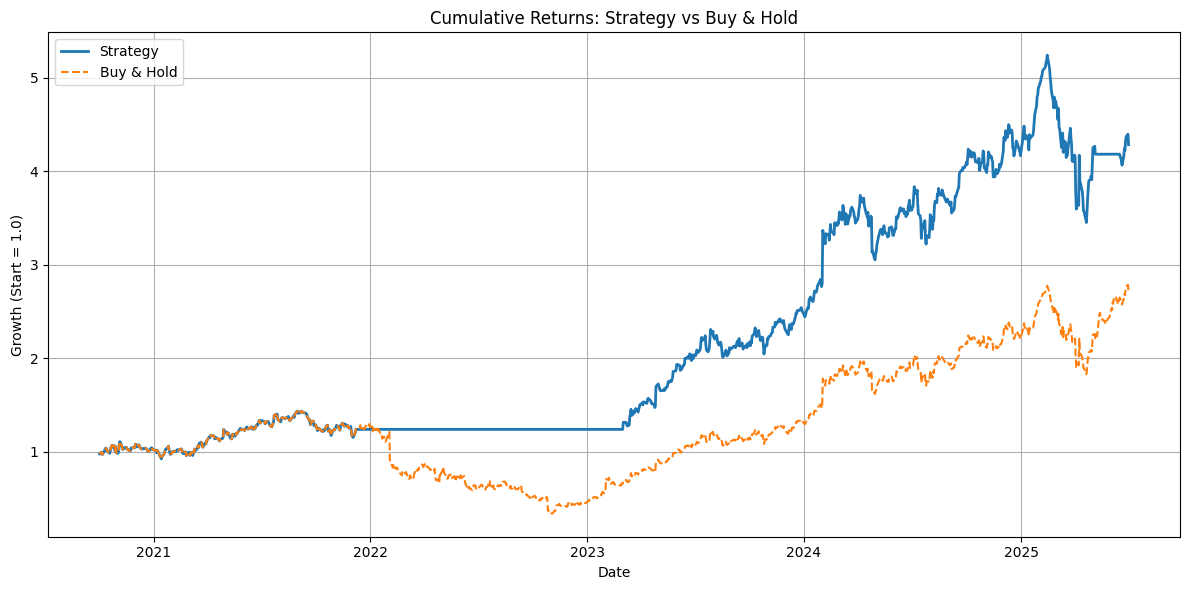

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for MSFT



Backtest Results:
Strategy Total Return: 105.56%
Buy & Hold Return: 141.15%


/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for GS

Backtest Results:
Strategy Total Return: 175.08%
Buy & Hold Return: 298.75%


/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for BLK

Backtest Results:
Strategy Total Return: 42.58%
Buy & Hold Return: 108.35%


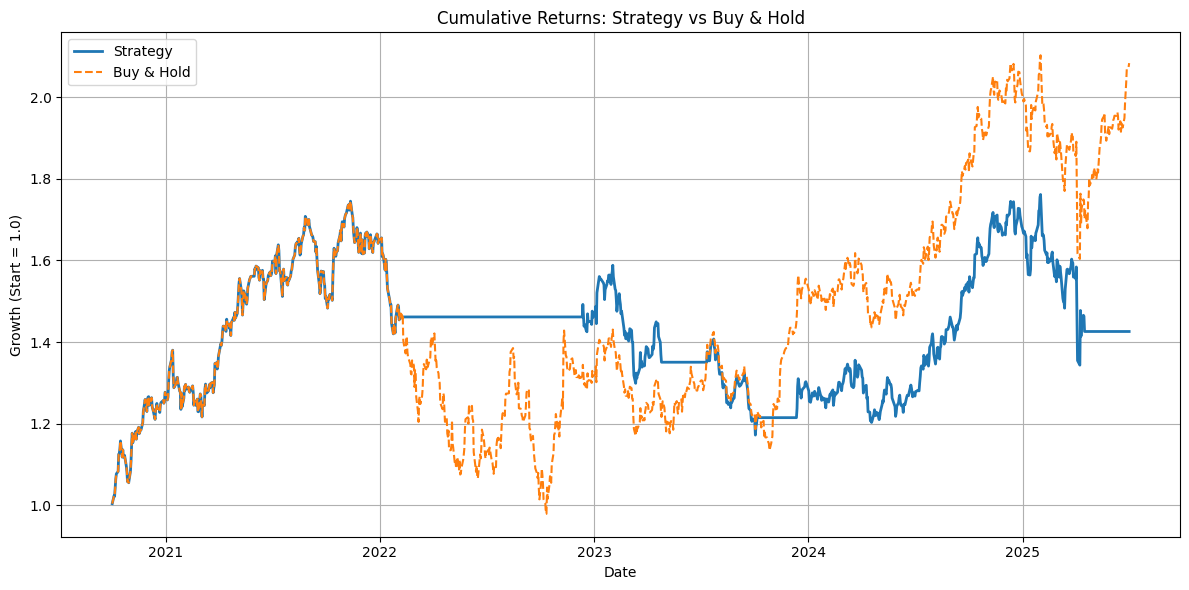

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for JPM



Backtest Results:
Strategy Total Return: 211.16%
Buy & Hold Return: 240.85%


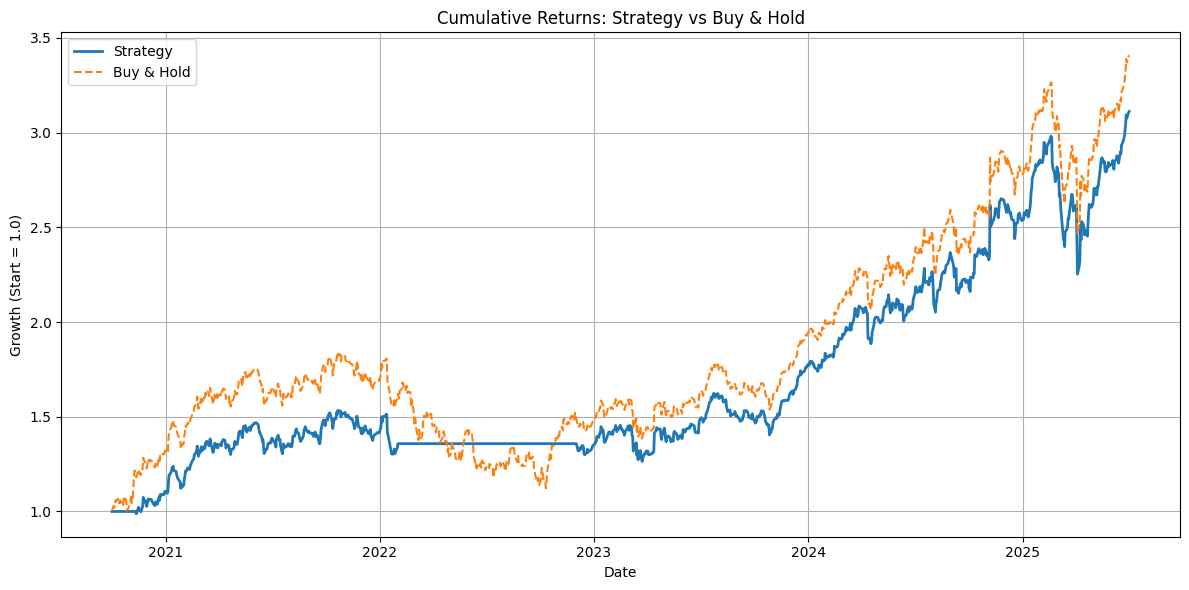

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for COST

Backtest Results:
Strategy Total Return: 119.22%
Buy & Hold Return: 198.05%


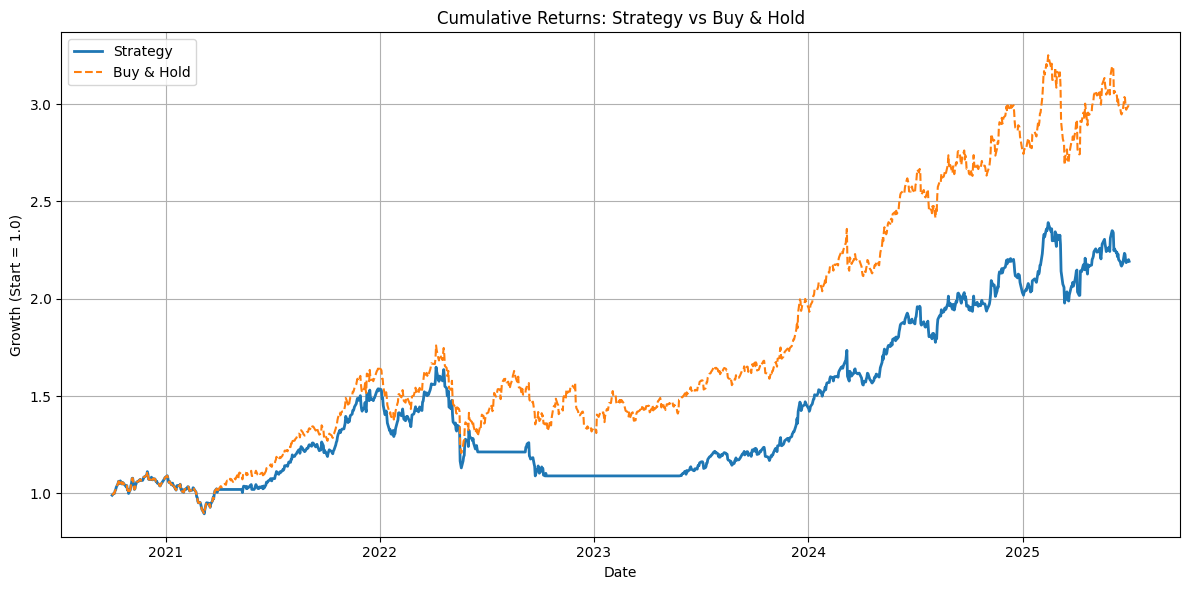

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for SOFI

Backtest Results:
Strategy Total Return: -13.43%
Buy & Hold Return: -12.76%


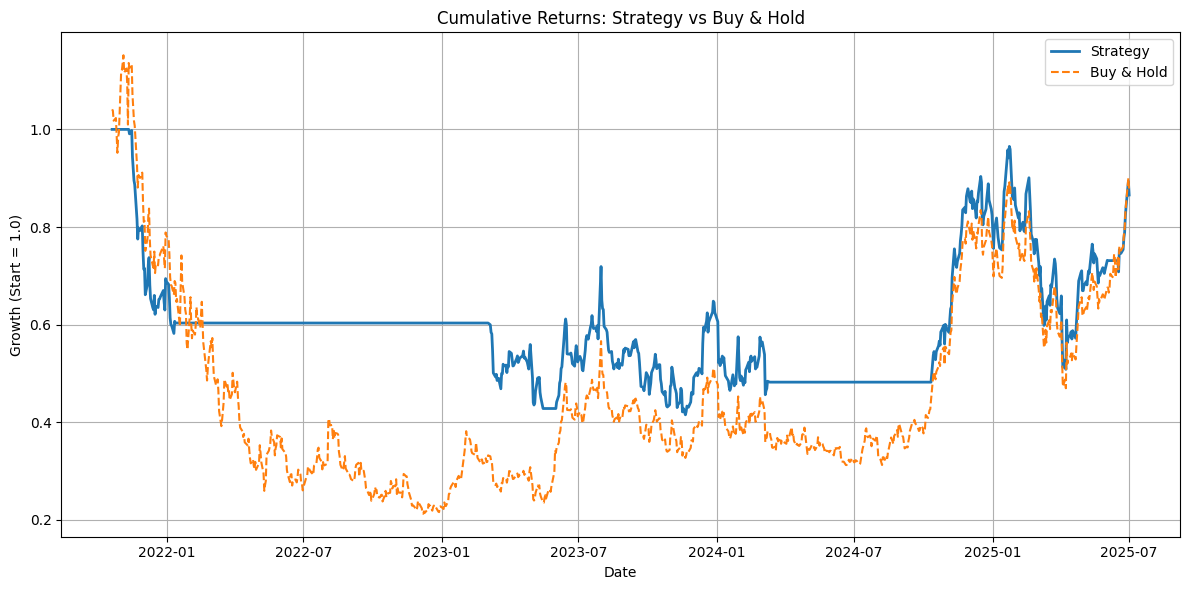

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for IBIT

Backtest Results:
Strategy Total Return: 50.84%
Buy & Hold Return: 50.84%


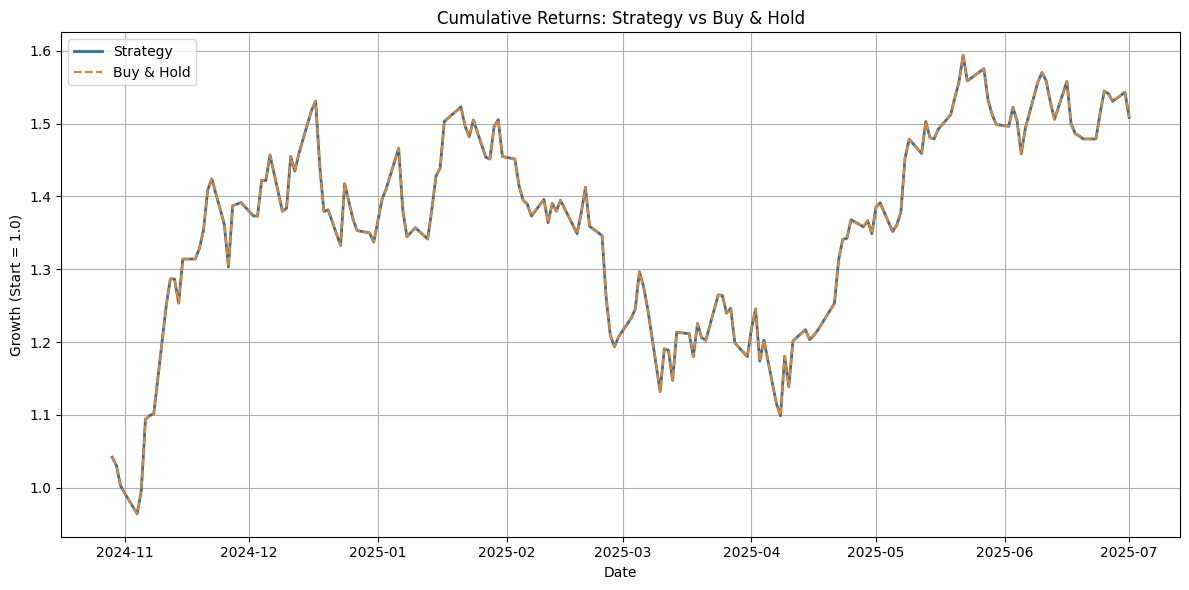

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for BITO

Backtest Results:
Strategy Total Return: 136.50%
Buy & Hold Return: 260.75%


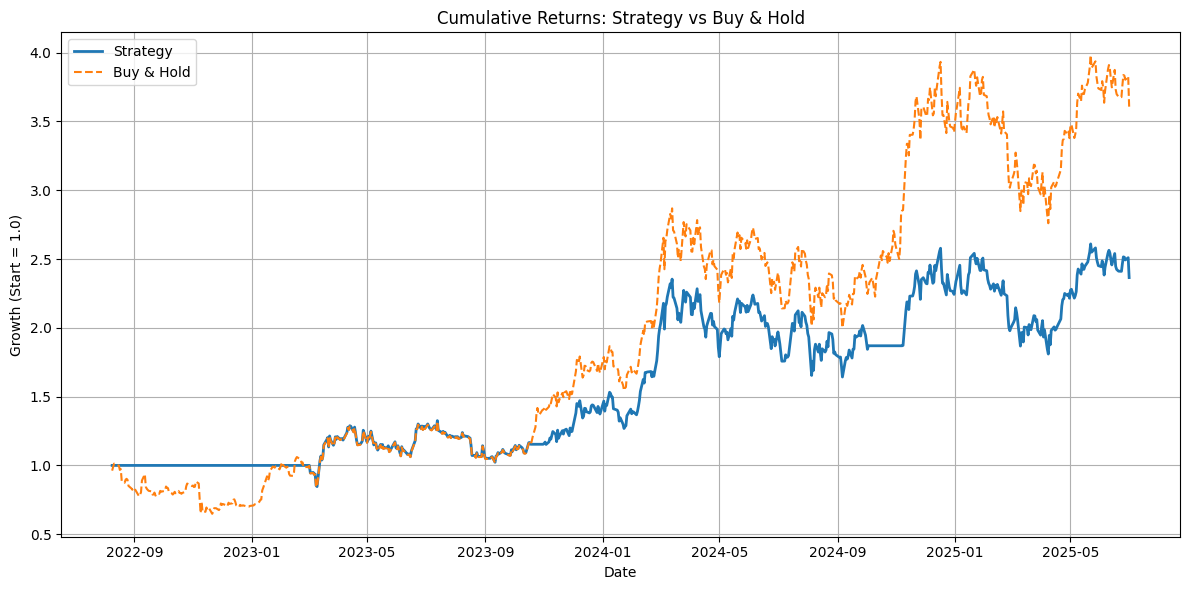

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for PTON

Backtest Results:
Strategy Total Return: -34.50%
Buy & Hold Return: -93.73%


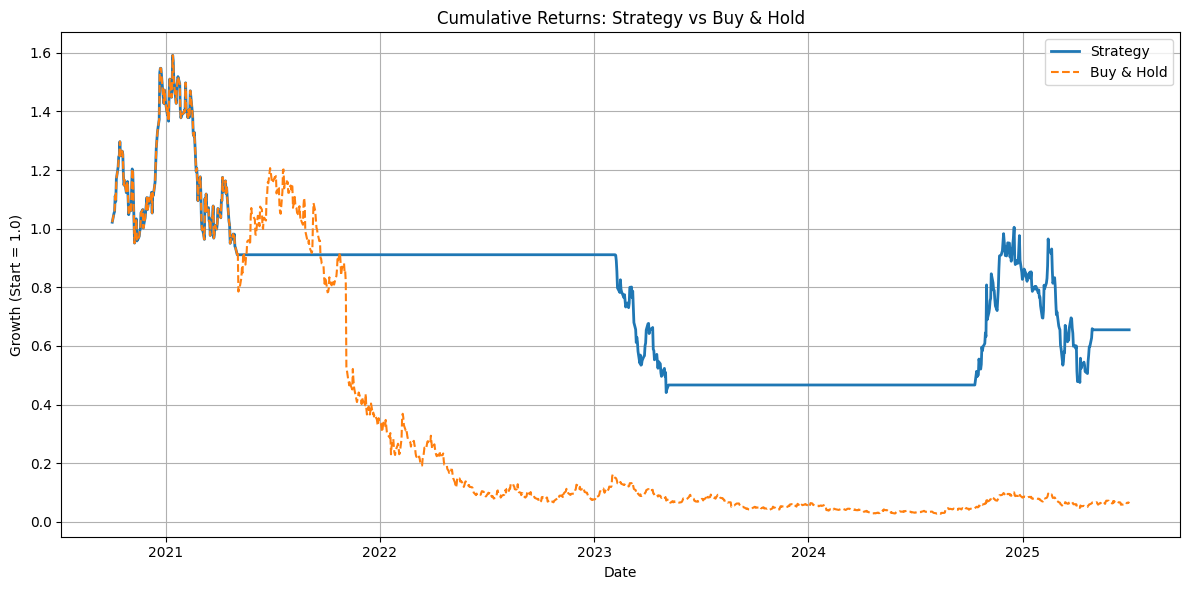

/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for YETI

Backtest Results:
Strategy Total Return: -4.46%
Buy & Hold Return: -29.23%


/tmp/ipython-input-22-2082066063.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for VNQ



Backtest Results:
Strategy Total Return: 1.71%
Buy & Hold Return: 33.76%


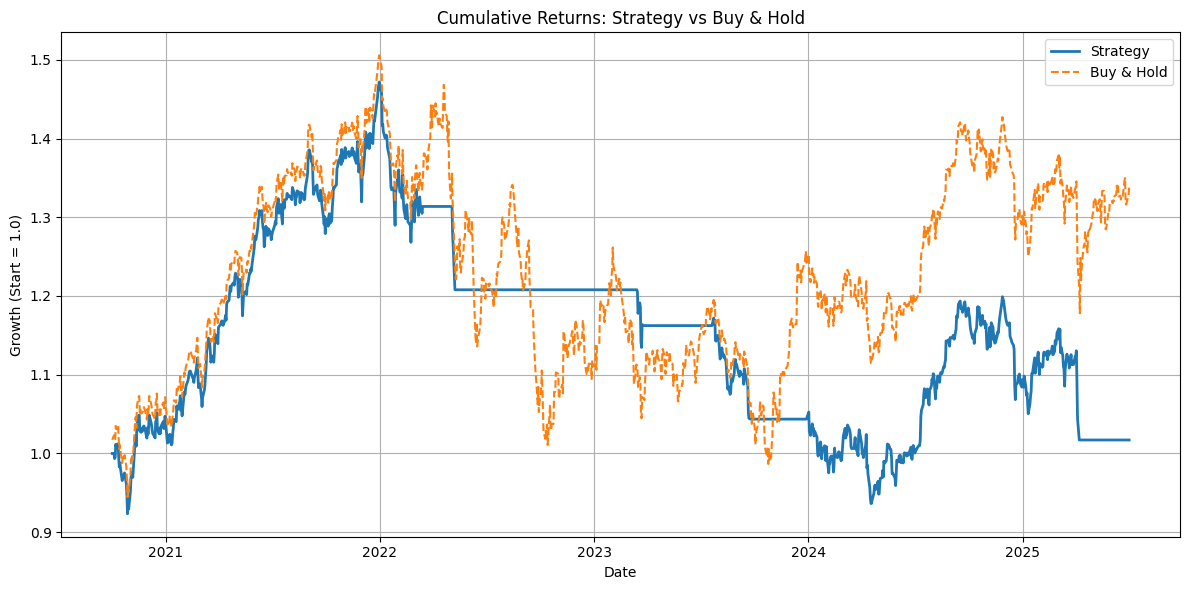

In [23]:
# ========================
# INPUT STOCK TICKERS HERE
# ========================
tickers = ['QQQ', 'VOO', 'DIA', 'BRK-B', 'TQQQ', 'AMZN', 'TSLA', 'VTI', 'NVDA', 'GOOGL', 'AAPL', 'QBIG', 'VB', 'META', 'MSFT', 'GS', 'BLK', 'JPM', 'COST',
           'SOFI', 'IBIT', 'BITO', 'PTON', 'YETI', 'VNQ']  # ← Add or remove tickers here

# Call the function to analyze each stock
for ticker in tickers:
    run_quant_model(ticker)

In [24]:
# Adding more parameters

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# ----------------------------------------
# STEP 1: Download historical price data
# ----------------------------------------

def get_data(ticker):
    end = datetime.today()
    start = end - timedelta(days=5*365 + 30)  # approx. 5 years
    df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
    return df

# ----------------------------------------
# STEP 2: Generate 50-day and 200-day SMAs + trading signals
# ----------------------------------------

def generate_signals(df):
    # Simple Moving Averages
    # SMA_t = (P_t + P_{t-1} + ... + P_{t-N+1}) / N
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    df.dropna(inplace=True)

    # Trading signal: 1 if SMA_50 > SMA_200 (bullish), 0 otherwise (bearish/neutral)
    df['Signal'] = 0
    df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1

    # We enter position based on yesterday’s signal
    df['Position'] = df['Signal'].shift(1).fillna(0)

    return df

# ----------------------------------------
# STEP 3: Backtest the strategy and report performance
# ----------------------------------------

def performance_report(df, initial_capital=10000, trading_cost=0.001):
    # Daily returns: R_t = (P_t / P_{t-1}) - 1
    df['Daily Return'] = df['Close'].pct_change().fillna(0)

    # Strategy return: R_strat = Signal_{t-1} * R_t
    # You only get return if you were in position the previous day
    df['Strategy Return'] = df['Position'] * df['Daily Return']

    # --- Slippage + Transaction Cost ---
    # Assumes 0.1% cost per trade (i.e. when position changes)
    df['Trade'] = df['Position'].diff().fillna(0).abs()
    df['Strategy Return Net'] = df['Strategy Return'] - df['Trade'] * trading_cost

    # --- Portfolio Value Over Time ---
    # Cumulative product simulates compound growth over time
    df['Portfolio Value'] = (1 + df['Strategy Return Net']).cumprod() * initial_capital
    df['Buy & Hold'] = (1 + df['Daily Return']).cumprod() * initial_capital

    # -------- PERFORMANCE METRICS --------

    # Total Return: (V_final / V_start) - 1
    total_return = df['Portfolio Value'].iloc[-1] / initial_capital - 1
    bh_return = df['Buy & Hold'].iloc[-1] / initial_capital - 1

    # CAGR (Compound Annual Growth Rate)
    # CAGR = (Final Value / Initial)^(1 / T_years) - 1
    trading_days = 252
    years = len(df) / trading_days
    cagr = (df['Portfolio Value'].iloc[-1] / initial_capital) ** (1 / years) - 1

    # Annualized Volatility
    # std(R) * sqrt(252)
    volatility = df['Strategy Return Net'].std() * np.sqrt(trading_days)

    # Sharpe Ratio: (mean(R) - R_f) / std(R)
    # Assuming R_f = 0 (no risk-free return for simplicity)
    sharpe = (df['Strategy Return Net'].mean() / df['Strategy Return Net'].std()) * np.sqrt(trading_days)

    # Max Drawdown = min(Portfolio / Running_Max - 1)
    cum_returns = (1 + df['Strategy Return Net']).cumprod()
    roll_max = cum_returns.cummax()
    drawdown = (cum_returns - roll_max) / roll_max
    max_dd = drawdown.min()

    # ----------- PRINT REPORT -----------
    print(f"==== Performance Report ====\n")
    print(f"Total Return (Strategy):                               {total_return*100:.2f}%")
    print(f"Total Return (Buy & Hold):                             {bh_return*100:.2f}%")
    print(f"CAGR (Compound Annual Growth Rate):                    {cagr*100:.2f}%")
    print(f"Annualized Volatility (std(R)*sqrt(trading_days=252)): {volatility*100:.2f}%")
    print(f"Sharpe Ratio (mean(R)-R_f / std(R)):                   {sharpe:.2f}")
    print(f"Max Drawdown (min(Portfolio / Running_Max - 1)):       {max_dd*100:.2f}%")

    # ----------- PLOT -----------
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Portfolio Value'], label='SMA Crossover Strategy', linewidth=2)
    plt.plot(df.index, df['Buy & Hold'], label='Buy & Hold', linestyle='--')
    plt.title("Strategy vs Buy & Hold: Portfolio Growth")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# STEP 4: Wrap all in one function
# ----------------------------------------

def run_quant_pipeline(ticker):
    print(f"\n\nAnalyzing {ticker}...\n")
    df = get_data(ticker)
    if df.empty:
        print("No data found.")
        return
    df = generate_signals(df)
    if df.empty:
        print("Not enough data after generating signals.")
        return
    performance_report(df)

/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing QQQ...

==== Performance Report ====

Total Return (Strategy):                               84.09%
Total Return (Buy & Hold):                             80.20%
CAGR (Compound Annual Growth Rate):                    15.35%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 17.12%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.92
Max Drawdown (min(Portfolio / Running_Max - 1)):       -22.77%


/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing VOO...

==== Performance Report ====

Total Return (Strategy):                               51.43%
Total Return (Buy & Hold):                             68.54%
CAGR (Compound Annual Growth Rate):                    10.20%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 13.27%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.80
Max Drawdown (min(Portfolio / Running_Max - 1)):       -18.69%


/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing DIA...



==== Performance Report ====

Total Return (Strategy):                               21.55%
Total Return (Buy & Hold):                             45.67%
CAGR (Compound Annual Growth Rate):                    4.67%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 12.06%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.44
Max Drawdown (min(Portfolio / Running_Max - 1)):       -15.95%


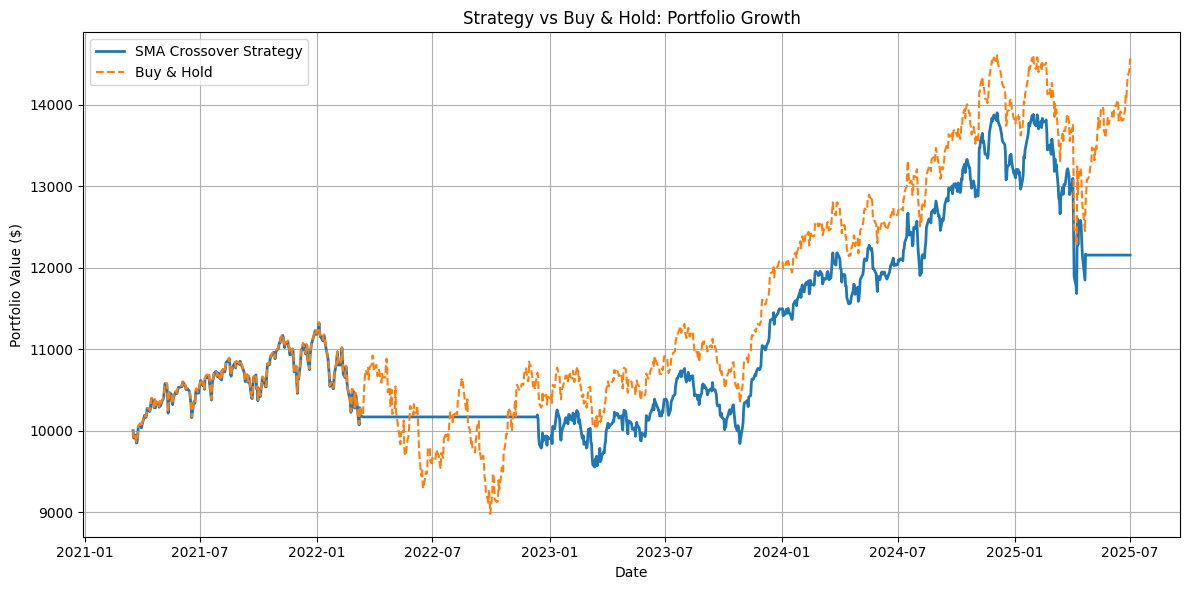

/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing BRK-B...

==== Performance Report ====

Total Return (Strategy):                               73.98%
Total Return (Buy & Hold):                             93.94%
CAGR (Compound Annual Growth Rate):                    13.83%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 15.67%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.91
Max Drawdown (min(Portfolio / Running_Max - 1)):       -26.70%


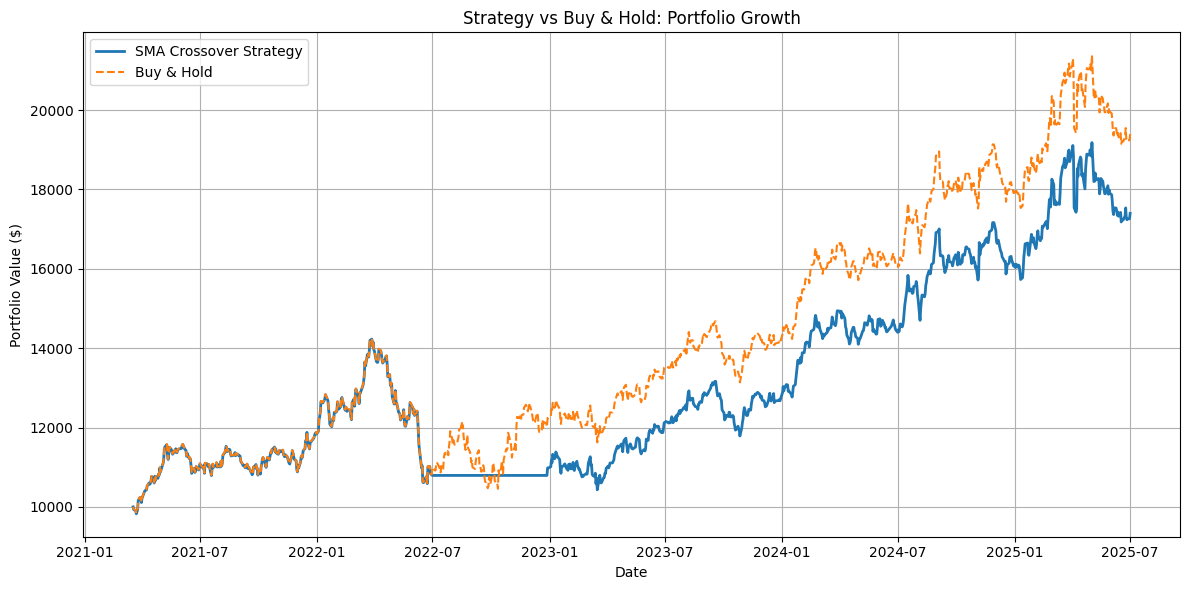



Analyzing TQQQ...



/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               122.41%
Total Return (Buy & Hold):                             97.53%
CAGR (Compound Annual Growth Rate):                    20.57%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 45.65%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.64
Max Drawdown (min(Portfolio / Running_Max - 1)):       -49.03%


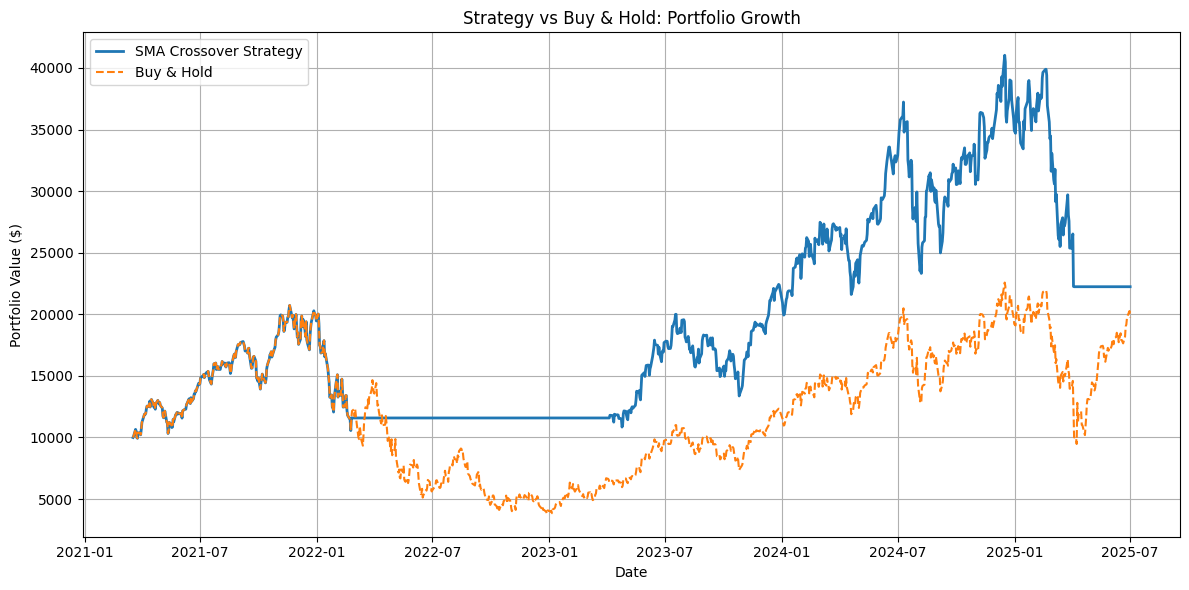

/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing AMZN...

==== Performance Report ====

Total Return (Strategy):                               28.73%
Total Return (Buy & Hold):                             45.61%
CAGR (Compound Annual Growth Rate):                    6.09%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 23.42%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.37
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.88%


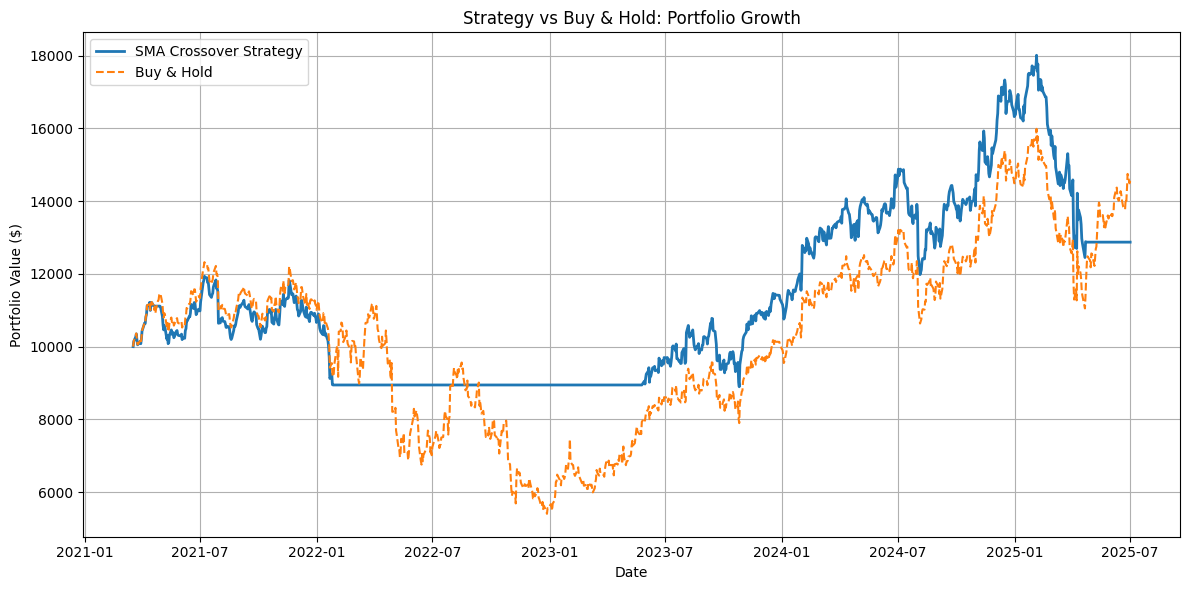

/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing TSLA...

==== Performance Report ====

Total Return (Strategy):                               -22.69%
Total Return (Buy & Hold):                             38.12%
CAGR (Compound Annual Growth Rate):                    -5.85%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 46.63%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.10
Max Drawdown (min(Portfolio / Running_Max - 1)):       -65.15%


/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing VTI...

==== Performance Report ====

Total Return (Strategy):                               38.91%
Total Return (Buy & Hold):                             58.20%
CAGR (Compound Annual Growth Rate):                    7.99%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 13.65%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.63
Max Drawdown (min(Portfolio / Running_Max - 1)):       -19.30%


/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing NVDA...



==== Performance Report ====

Total Return (Strategy):                               906.07%
Total Return (Buy & Hold):                             1107.79%
CAGR (Compound Annual Growth Rate):                    71.63%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 44.96%
Sharpe Ratio (mean(R)-R_f / std(R)):                   1.42
Max Drawdown (min(Portfolio / Running_Max - 1)):       -36.29%


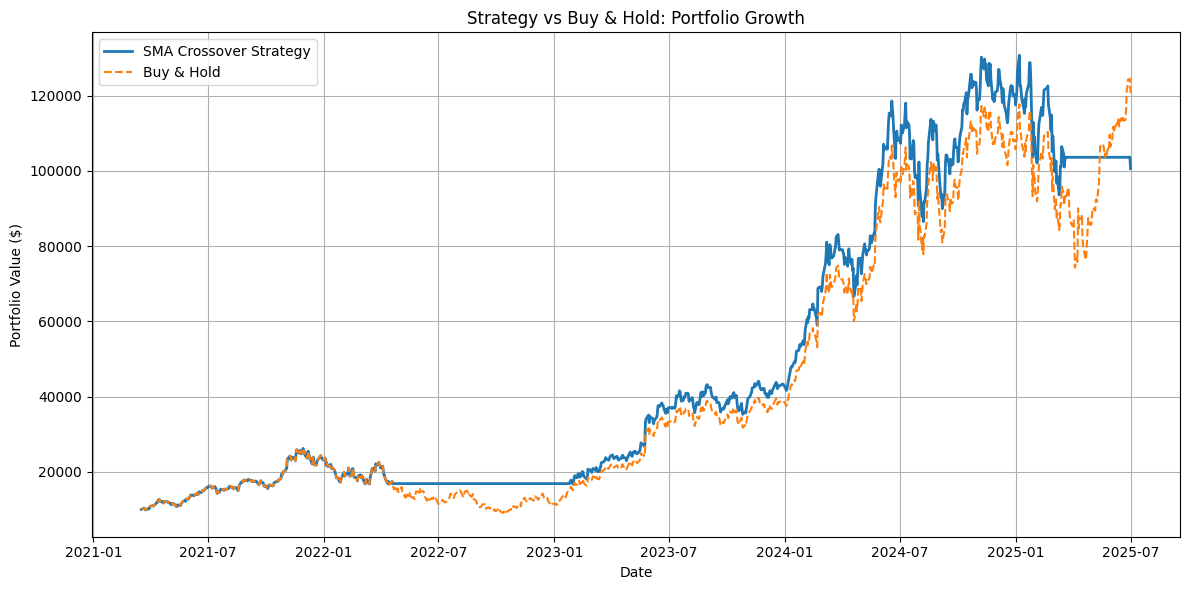

/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing GOOG...

==== Performance Report ====

Total Return (Strategy):                               79.38%
Total Return (Buy & Hold):                             74.80%
CAGR (Compound Annual Growth Rate):                    14.65%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 22.12%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.73
Max Drawdown (min(Portfolio / Running_Max - 1)):       -29.42%


/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing AAPL...



==== Performance Report ====

Total Return (Strategy):                               4.89%
Total Return (Buy & Hold):                             76.49%
CAGR (Compound Annual Growth Rate):                    1.12%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 21.19%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.16
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.79%


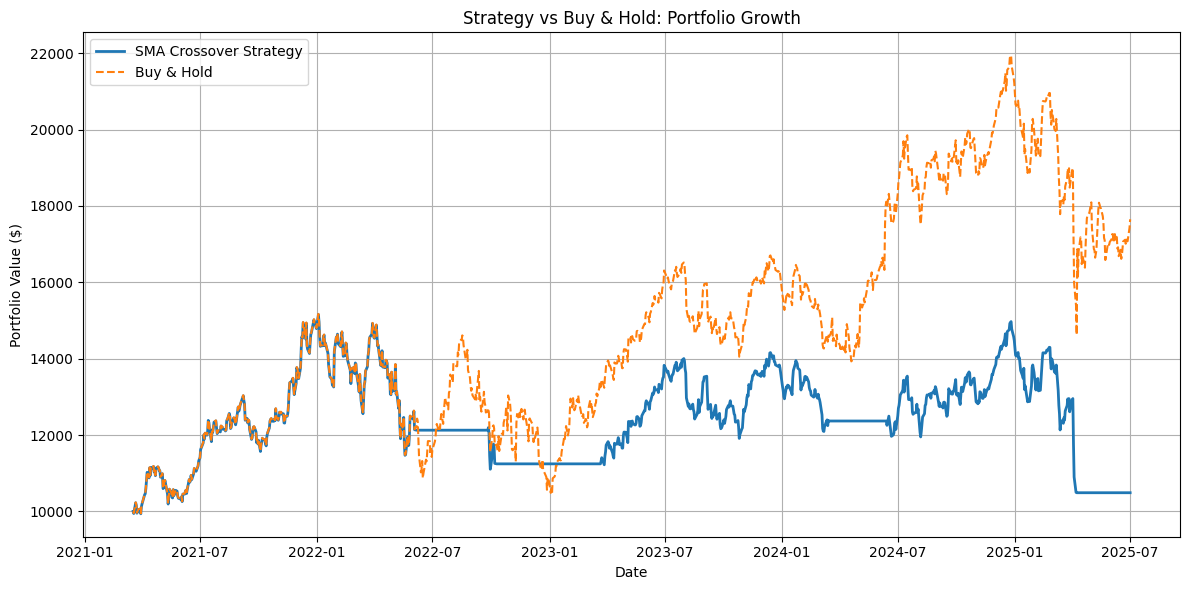

/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing QBIG...

Not enough data after generating signals.


Analyzing VB...




/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               -21.98%
Total Return (Buy & Hold):                             18.35%
CAGR (Compound Annual Growth Rate):                    -5.64%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 14.71%
Sharpe Ratio (mean(R)-R_f / std(R)):                   -0.32
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.02%


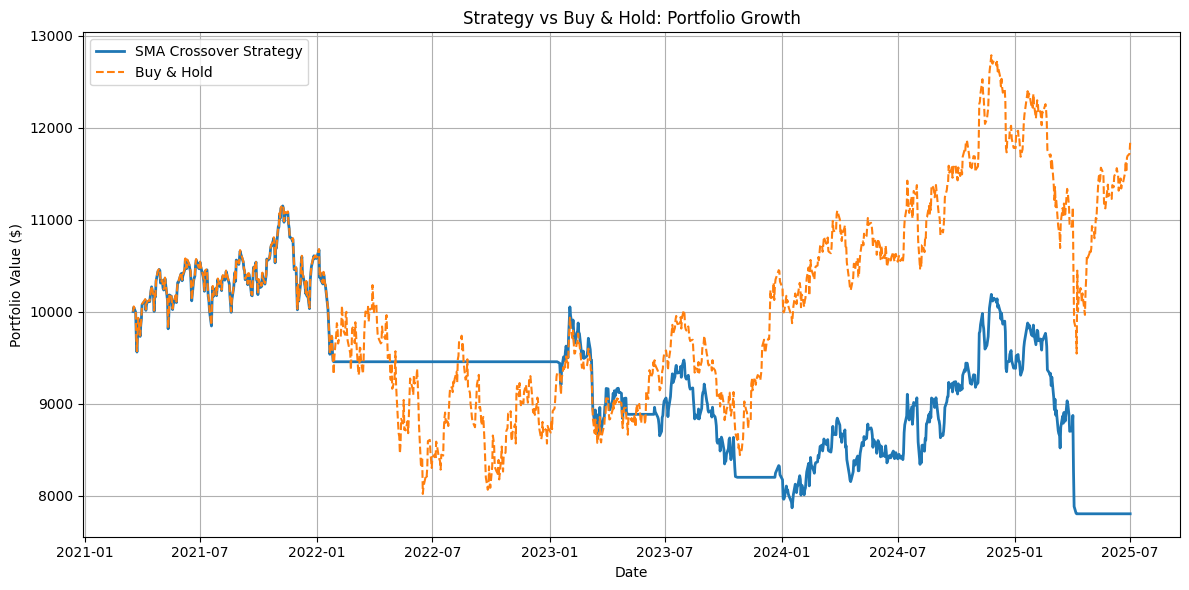

/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing META...

==== Performance Report ====

Total Return (Strategy):                               307.88%
Total Return (Buy & Hold):                             159.55%
CAGR (Compound Annual Growth Rate):                    38.95%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 29.06%
Sharpe Ratio (mean(R)-R_f / std(R)):                   1.28
Max Drawdown (min(Portfolio / Running_Max - 1)):       -34.15%


/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing MSFT...

==== Performance Report ====

Total Return (Strategy):                               87.05%
Total Return (Buy & Hold):                             120.97%
CAGR (Compound Annual Growth Rate):                    15.78%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 18.52%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.88
Max Drawdown (min(Portfolio / Running_Max - 1)):       -19.54%


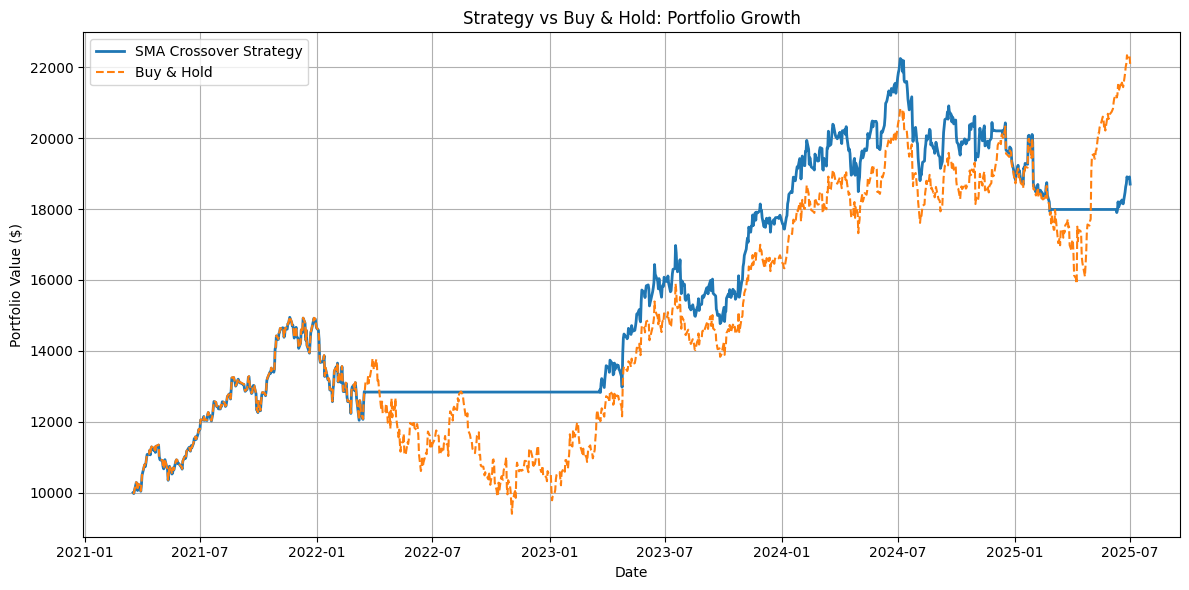

/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing GS...

==== Performance Report ====

Total Return (Strategy):                               53.78%
Total Return (Buy & Hold):                             125.39%
CAGR (Compound Annual Growth Rate):                    10.59%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 23.04%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.55
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.90%


/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing BLK...

==== Performance Report ====

Total Return (Strategy):                               9.79%
Total Return (Buy & Hold):                             61.71%
CAGR (Compound Annual Growth Rate):                    2.21%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 18.65%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.21
Max Drawdown (min(Portfolio / Running_Max - 1)):       -33.11%


/tmp/ipython-input-24-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing JPM...



==== Performance Report ====

Total Return (Strategy):                               124.24%
Total Return (Buy & Hold):                             106.24%
CAGR (Compound Annual Growth Rate):                    20.80%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 20.77%
Sharpe Ratio (mean(R)-R_f / std(R)):                   1.01
Max Drawdown (min(Portfolio / Running_Max - 1)):       -24.42%


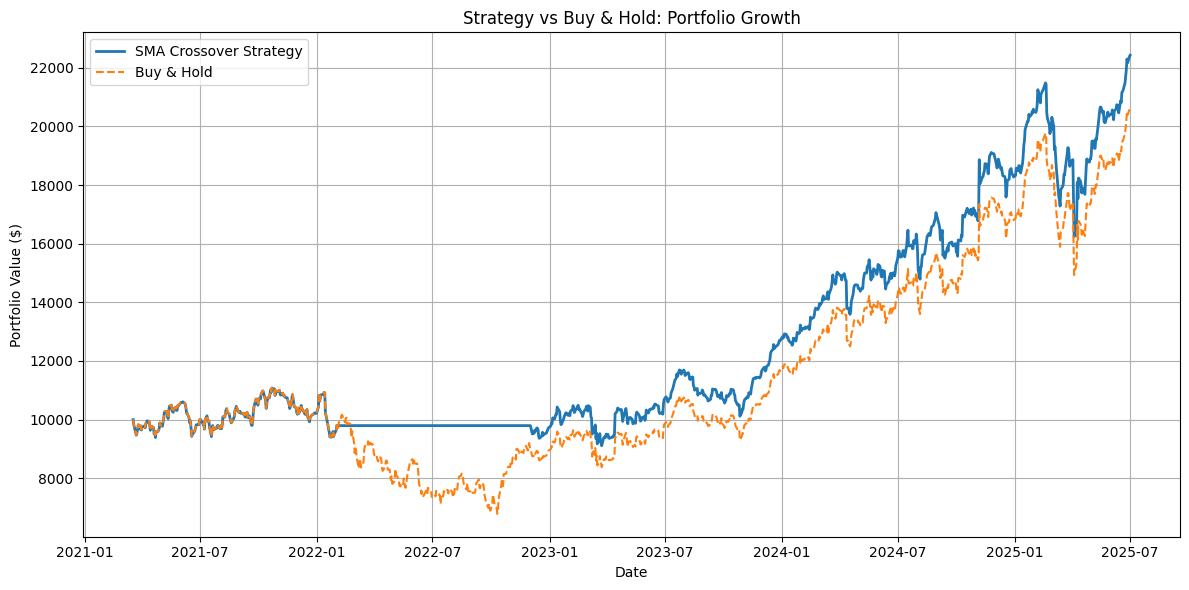

In [25]:
# === INPUT YOUR STOCK TICKERS HERE ===
tickers = ['QQQ', 'VOO', 'DIA', 'BRK-B', 'TQQQ', 'AMZN', 'TSLA', 'VTI', 'NVDA', 'GOOG', 'AAPL', 'QBIG', 'VB', 'META', 'MSFT', 'GS', 'BLK', 'JPM']  # ← Add or remove tickers here

for ticker in tickers:
    run_quant_pipeline(ticker)